<a href="https://colab.research.google.com/github/HarshPatel-HP/Research-Impact-Modelling-RIM/blob/master/Research_Impact_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **DISCOVERY**



---



> ## **Google Scholar**



Google Scholar is an open web search engine that was launched around 15 years ago on November 20, 2004. The main purpose behind the development was to increase efficiency for the problem solvers like us by providing them easy and reliable access to tons of scientific knowledge at one place.  This is reflected in their slogan – “Stand on the shoulders of giants”.

Google Scholar indexes academic journals, conference papers, abstracts, technical reports, theses, books, and scholarly web pages. It allows users to search for physical or digital copies of articles and papers. The search keywords derives the most applicable results based upon the number of citations associated, the author's ranking and the ranking of the paper that the journal appears in. The two intelligible features of google scholar are - 'group by' and 'cited by'. Due to all these reasons, it has become the first choice for any researchers, students or experts.

Google Scholar emphasises on citation count and the keywords matched in the document’s title. Hence, the top search results are usually highly cited articles. The search engine optimization for Google Scholar have been popular since many years. However, it is true that Google Scholar has been denounced for not reviewing journals and not indexing the predatory journals. Also, its repository consists of information from various sources. There is no real-time control on the web resources which affects the ranking of publications.

Google Scholar's search engine works as the logical flow in below figure:

![Google Scholar Search Engine Workflow](https://drive.google.com/uc?id=1VAQVKT6WtcM44drWea3d0OkHYW-rEngd)




> ## **Problem Definition**






Researches are the means to understand various issues and increase public awareness. It is a way to prove lies and support truths. The studies and the outcomings define the quality of the research. 

Google Scholar does not provide a tool to measure the impact and the shortcomings of any research. It does not analyze and compare researches in accordance with the universities which helps to learn the growth of research areas and programs. Google Scholar lacks the statistical knowledge or performance metrics of any author or university as a whole. Apart from Google Scholar, we didn't came across any tool that measures the impact of any research. Thus, we are here to initiate this novel prolem and explore worthy solution for this problem. 

### Our problem is to find an approach for - **Measuring Research Impact of an author and/or University"** 

This goal will include measuring and predicting h-index for authors and comparing and measuring research impact of different universities.



# **DATA GATHERING/PREPARATION**



---











> ## **Web Crawling**

There was no real-time dataset available for the authors of Google Scholar. Hence, we decided to gather data by crawling the Google Scholar's website and scraping the data from there. 

During the initial stage of our project, we aimed to gather data for 'University of Regina'. With advancement in our work, we scraped data for Top 31 Universities in Canada listed at https://www.timeshighereducation.com/student/best-universities/best-universities-canada#survey-answer. 

The crawler was developed in Python language using Selenium and Scrapy libraries of python.Two crawlers/scripts are designed which work independently -

1.   **author_profile_urls.py**
 
 This crawler scrapes the URLs for the profile of each author enlisted under the above listed universities. The scraped data is stored in a CSV file.

2.   **generic_author_profile_scraping.py**

 This crawler scrapes the author profiles by visiting the author URLs one by one for the respected university. It reads the above scraped CSV file and stores the scraped data in another CSV file.

Our crawler executes the following logical flow as shown in figure and explained underneath it:


![Logical Flow of Web Crawling](https://drive.google.com/uc?id=1TTgPvjNc1WTXQHaIeZbGa7FcJ2j8PFvc)




*   Open the targeted web page - https://scholar.google.com/

*  Gather URLS for each university one after the other. The scraper is feeded with the main page URL which consistes of the profiles of the authors of that university. The scraper stores  the URLs of all author profiles into a CSV file.

 For example, if we want to scrape the data for the University of Regina, then first we manually feed the URL of the University of Regina’s homepage (https://scholar.google.ca/citations?view_op=view_org&org=17604985044000112092&hl=en&oi=io) to ***author_profile_urls.py*** and from there the crawler is responsible to collect the URLs of every author who are associated with University of Regina.

*   Once we have the list of URLs in a CSV file, we input this file to the second crawler ***generic_author_profile_scraping.py*** to scrape the data from each author's profile. In this script, the crawler visits the URLs one by one in the Selenium controlled Chrome browser. This was created using selenium based automated chromedriver.

* After executing each script it will automatically close the Selenium created Chrome browser. One point to note here is that, we open/create the CSV file when we run the script and once all crawling is performed all data is written to another CSV file. Any interruption in between will cause scraper to stop working and will write only that data which has been scraped till that moment.

* While web scraping, it is necessary to maintain the ethics of crawling a webpage. So, the crawlers have a 3 minute sleep between each query/URLs execution. In this manner, the targeted server will not be over flooded with a number of requests coming in from a single IP address. 



> ## **Dataset Summary**



Our final dataset consists of **44842 data samples** and **15 variables** which is stored in ***Author_Profile_Master.csv*** CSV file.

The dataset was built on a daily basis in order to maintain high-level transparency and data gets larger day-by-day. This helped us in achieving high accuracy of the machine learning model by feeding large training dataset into it.

The scraped data comprises of following attributes:

1. Author Name - Name of an author
2. Designation - Position of an author in respected universit/organization
3. Organization - Institution or university name of the author
4. Field - The major research area of the author
5. Citations - Total number of citation count of an author till present day
6. Citations Last Five Years - Total number of citation count gained by an author since last five years
7. h-index - h-index of an author
8. h-index Last Five Years - h-index gained since last five years
9. i10-index - i-10 index of an author
10. i10-index Last Five Years - i10-index gained by an author since last five years
11. Citation Count Year Wise - List of citation count gained in each year till present year
12. Co-authors - Names of all the co-authors of an author 
13. Number of Publications - Total number of publications publised by an author
14. Years Since First Publication - Total number of years in research since author's first publication
15. Flag - Scraping Counter Variable

# **DATA SCRUBBING**



---


### **Part A: Importing the Dataset**

*   Upload the CSV file of the dataset on Google Drive.
*   Import drive library of the google colab into the notebook

```
from google.colab import drive
```
*   Mount the gdrive (Google Drive) with the drive module. For this, it would ask for authorization code to access Google Drive.



```
drive.mount('/content/gdrive', force_remount=False)
```


*   Once the google drive is mounted, we can directly read the CSV file using the pandas library. Pandas come from Panel Data. It is a software library written in python language and available for data manipulation and analysis.



```
UofR_Authors_Profile = pd.read_csv('/content/gdrive/My Drive/Data Science/Generic_Author_Profile.csv')
```











Below cell imports all the necessary python libraries required to build and execute the Python code:

In [0]:
# Importing all the necessary python libraries to execute the code.
from google.colab import drive
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import datetime
from pandas import DataFrame
from google.colab import files
import collections 
import itertools 
import statistics
import ast  
import math
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
import warnings
import IPython
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.linear_model import RidgeCV, BayesianRidge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import mean_squared_error, r2_score, plot_roc_curve, accuracy_score, mean_absolute_error
from sklearn.svm import SVR
from prettytable import PrettyTable

In [0]:
!pip install pyldavis
from sklearn.decomposition import LatentDirichletAllocation as LDA
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

Google Colab is mounted with the Google Drive to fetch the dataset.

In [0]:
# Mounting the drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The CSV file of dataset is read and stored in a variable. 

The dataset is converetd into a dataframe using *DataFrame()* function. Data frames, are simply meant to be a 2- Dimensional structure with various elements as columns and instances as rows formally looking like a spreadsheet or a table.



In [0]:
# Reading the csv file of dataset available on Google Drive
Generic_Authors_Profile = pd.read_csv('/content/gdrive/My Drive/Data Science/Author_Profile_Master.csv')

# Converting dataset into DataFrame
authors_df = DataFrame(Generic_Authors_Profile)

### **Part B: Data Cleaning**

Data Scrubbing is the process of identifying and removing or correcting inaccurate records from a dataset and refers to recognising unfinished, unreliable, inaccurate or non-relevant parts of the data and then restoring, remodelling, or removing the dirty or crude data.

As the New York Times reported in a 2014 article called “For Big-Data Scientists, ‘Janitor Work’ Is Key Hurdle to Insights” -


> *Data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time actually analyzing it.*

Therefore, one can say that, data cleaning techniques are not only an essential part of the data science process – it’s also the most time-consuming part.


Data Scrubbing or Cleaning is 4-step process:



1.  Remove Unwanted Observations
2.  Fix Structural Errors 
3.  Filter Unwanted Outliers
4.  Handle Missing Data

These steps are performed as follows:



*  **Summary of dataframe**

 A concise summary of our dataframe is perceived using `info()` method.It prints information about number of rows and columns, column datatypes, non-null values and memory usage from this it becomes easy to look for null instances in our datframe and deal with it.



In [0]:
# Obtaining DataFrame information including columns, number of instances, type of instances and memory usage
print("Summary of author's dataframe:")
print("\n")
authors_df.info()
print("\n")

Summary of author's dataframe:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44842 entries, 0 to 44841
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Author Name                  44842 non-null  object 
 1   Designation                  44842 non-null  object 
 2   Organization                 44842 non-null  object 
 3   Field                        44842 non-null  object 
 4   Citations                    43344 non-null  float64
 5   Citations Last Five Years    43344 non-null  float64
 6   h - index                    43344 non-null  float64
 7   h - index Last Five Years    43344 non-null  float64
 8   i10 - index                  43344 non-null  float64
 9   i10 - index Last Five Years  43344 non-null  float64
 10  Citation Count Year wise     44842 non-null  object 
 11  Co-Authos                    44842 non-null  object 
 12  Number_of_Publication        44842 non-nu


* **Print columns**    

 Column names is obtained using `column` attribute.


In [0]:
# Obtaining names of the columns in DataFrame
print("Column Names of author's dataframe:")
print("\n")
authors_df.columns

Column Names of author's dataframe:




Index(['Author Name', 'Designation', 'Organization', 'Field', 'Citations',
       'Citations Last Five Years', 'h - index', 'h - index Last Five Years',
       'i10 - index', 'i10 - index Last Five Years',
       'Citation Count Year wise', 'Co-Authos', 'Number_of_Publication',
       'Years_Since_First_Pub_Year', 'Flag'],
      dtype='object')



*   **Rename the columns**

 Columns are renamed using `rename()` function to follow the standard naming conventions, that is, letters are in lower case and space is replaced by underscore.


In [0]:
# Renaming column names
authors_df.rename(columns = {'h - index': 'h-index', 'h - index Last Five Years': 'h-index since Last Five Years', 'citations Last Five Years': 'citations since Last Five Years',
                             'i10 - index' : 'i10-index', 'i10 - index Last Five Years': 'i10-index since Last Five Years','Co-Authos': 'Co-Authors',
                              'Years_Since_First_Pub_Year': 'Year_Since_First_Publication', 'Organization': 'University',
                             'Field': 'Research Domain'}, inplace = True)

authors_df.columns = [i.replace(' ', '_').lower() for i in authors_df.columns] 



*   **Print head of dataframe**

 The top instances of the dataframe is printed using `head()` method which takes argument for number of rows to be printed.




In [0]:
# Print the head of the dataframe
authors_df.head(1)

,author_name,designation,university,research_domain,citations,citations_last_five_years,h-index,h-index_since_last_five_years,i10-index,i10-index_since_last_five_years,citation_count_year_wise,co-authors,number_of_publication,year_since_first_publication,flag
0,Gavin L. Simpson,"Quantitative Environmental Scientist,",University of Regina,"['Palaeolimnology', 'statistical ecology', 'co...",25243.0,19351.0,34.0,29.0,55.0,48.0,"[['2007', '2008', '2009', '2010', '2011', '201...",[],139,20,0



*   **Null Instances/Missing Values** 

 We know that dataframe has null instances. We, hereby, print the null instances in a specific column using `isnull()` function. 
 
 And, also print the null instances of entire dataframe which returns boolean True/False value. Null insatnces are the one with the True value.




In [0]:
# Viewing null instances of dataset
auth_null_citations = np.where(authors_df["citations"].isnull() == True)
print("Records with null citations:\n", authors_df.loc[auth_null_citations], "\n")

# Null instances of the dataframe
print("Null values in dataframe:")
authors_df.isnull()

Records with null citations:
                   author_name  ... flag
254                  Jun Yang  ...    0
255              Jared Suchan  ...    0
257            Zeinab Ramadan  ...    0
258             Trevor Tomesh  ...    0
259    S. Mohammad Mirbagheri  ...    0
...                       ...  ...  ...
44837         Arshad A Shaikh  ...    0
44838             Kavi Heerah  ...    0
44839       Ryan J. A. Murphy  ...    0
44840        Razyeh Behbahani  ...    0
44841  Kyle J. N. d'Entremont  ...    0

[1498 rows x 15 columns] 

Null values in dataframe:


,author_name,designation,university,research_domain,citations,citations_last_five_years,h-index,h-index_since_last_five_years,i10-index,i10-index_since_last_five_years,citation_count_year_wise,co-authors,number_of_publication,year_since_first_publication,flag
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44837,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False
44838,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False
44839,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False
44840,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False




*   **Fill Missing Values**

 The missing instances in the columns like Research Domain, Co-authors and Number of Publications are filled using `fillna()` method.
 



In [0]:
# Filling the null values of the instances
authors_df['research_domain'].fillna('No domain available',inplace=True)
authors_df['co-authors'].fillna('No co-authors available',inplace=True)
authors_df['number_of_publication'].fillna(0,inplace = True)


*   **Drop Null Instances** 

 The records with null citations, h-index, i10 index, citation since last five years, h-index since last five years, i10 index since last five years are dropped from the dataframe using `dropna()` method.

 The main aim of this project is to predict h-index of an author. But, when we don't find  h-index or citations for the current time, we won't be able to predict future h-index for such instance. So, such records are removed from the dataframe.

 Once the null records are removed, the indexes in the dataframe are resetted using the `reset_index()` method to avoid Index Error.








In [0]:
# Drop record with null values
authors_df = authors_df.dropna(axis = 0)

# Drop records with number pf years as 0
indexNames = authors_df[authors_df['year_since_first_publication'] == 0].index
authors_df.drop(indexNames, inplace=True)

# Dropping outliers
indexes = authors_df[authors_df['year_since_first_publication'] >= 200].index
authors_df.drop(indexes, inplace=True)

# Reset the index, once the records are deleted from the dataframe.
authors_df.reset_index(drop=True, inplace=True)



*   **Drop Unnecessary Columns**

 Flag was set in the dataset during the web scraping, which have no purpose now. We have the total citations column in our dataset, so yearly citation count is not required. Such columns are discarded using `drop()` method.




In [0]:
# Drop unnecessary columns
authors_df = authors_df.drop(columns = ['flag', 'citation_count_year_wise'])



*  **Dimension of dataframe**

 `shape` attribute prints the number of rows and columns of dataframe. The cleaned dataframe has 16175 rows and 11 columns.



In [0]:
# Print the shape of dataframe
authors_df.shape

(43024, 13)

## **Part C: Feature Engineering**

Feature Engineering is a data mining technique that transforms the raw data into more understandable and efficient form. These features can be used to improve the performance of machine learning algorithms.

For most practical problems, feature engineering is a labor-intensive process that demands a lot of creativity and, preferably, domain knowledge.

To give an example, 'Co-authors' column represents raw data (names of all the co-authors of an author). This column can be encoded into 'Number of Co-authors' which can be a numerical data providing more information when comparing author's social behaviour or relationships with other authors.





*   **Derive New Columns from Existing Raw Data**

 The dataframe has several columns which doesn't anticipate ample statistical information. For this reason, such existing data is used to derive following new columns:





> **Average Citations**

By using the total citations of each author and his number of years in the research field, the average number of citations that author obtains in a year is calculated. 

Average citations can be a very advantageous metric to assess the yearly impact for an author. As such, it can be used as an alternative to the h-index.



In [0]:
# Deriving average citations for each author
average_citations_list = []
citation_list = authors_df['citations'].tolist()
year_since_first_publication_list = authors_df['year_since_first_publication'].tolist()

for i in range(len(citation_list)):
  if citation_list[i] !=0 and year_since_first_publication_list[i]!=0:
    average_citations_list.append(round(citation_list[i]/(year_since_first_publication_list[i]),2))
  else:
    average_citations_list.append(0)

# Adding average citations in the dataframe
authors_df['average_citations'] = average_citations_list



> **Author Rank**

Author rank is the rank provided to each author in consideration with the average citations. It is assumed that higher the citations and/or the h-index, the higher is the author rank and/or the h-rank. This is because of the higher-interdependency of the author's citations and the h-index.



In [0]:
# Deriving author rank and adding it in dataframe
authors_df['author_rank'] = authors_df['average_citations'].rank(ascending =0)

  



> **Number of Co-authors**

The Co-authors column consists of the names of all the co-authors of a author. By using this, a new column is derived to calculate the count of coauthors each author have which is named as Number of Co-authors. 

Number of Co-authors = count(Co-authors)


    













In [0]:
# Counting no of co-authors for each author
coauthors_list = authors_df['co-authors'].to_list()
for i in range(len(coauthors_list)):
  if len(coauthors_list[i]) ==0:
    coauthors_list[i] = 'No co-authors available'
auth_number_of_coauthors = []
for ele in coauthors_list:
  if ele!=('No co-authors available'):
    item = ele.split(",")
    auth_number_of_coauthors.append(len(item))
  else:
    item= ele
    auth_number_of_coauthors.append(len(item) - 1)

# Deriving a new column for number of co-authors
authors_df['number_of_coauthors'] = auth_number_of_coauthors



> **Sociality**

 Sociality is a rank given to each author in consideration with number of co-authors. It describes the socialized behaviour of any author. 

If the number of co-authors is high, it is a possibility of increase in citations of that author. As it is likely that most of the author's co-authors cite the author's publication. 



In [0]:
# Deriving sociality rank and adding it in dataframe
authors_df['sociality'] = authors_df['number_of_coauthors'].rank(ascending = 0)



> **h-Rank**

h-rank is a rank given to each author in consideration with the h-index of the author. This rank is given using the `rank()` method.



In [0]:
# Deriving h-rank and adding it in dataframe
authors_df['h-rank'] = authors_df['h-index'].rank(ascending=0)



> **Seniority**

Seniroity is a rank given to each author in consideration with the Years Since First Publication. This parameter shows how old the author is in the research field. 

It is expected that lower the seniority of a author, higher the h-index and citations for that author. If this is the situation, it can be said that author's profile is growing in the right path.


In [0]:
# Deriving seniority rank and adding it in dataframe
authors_df['seniority'] = authors_df['year_since_first_publication'].rank(ascending =0)



> **m-factor**

  m-factor is a value which defines the productivity of a author based on the number of years contributed in the research field and h-index achieved in that time span.

  m-factor = h-index/Years Since First Publication

 For instance, consider two authors A and B. A has h-index 20 and years of research is 5 years and B has h-index 25 and years of research is 12 years. In this case, when the productivity of authors A and B are directly compared depending on their h-index value, then B is more productive than A (25 > 20).

 However, this is not true as B gained h-index 25 in 12 years and A gained h-index 20 in 5 years. So, 

 m-factor of A = 20/5 = 4
 m-factor of B = 25/12 = 2.08

 m-factor proves that author A is two times productive than B. 


In [0]:
# Computing m-factor which replicates the productivity of a author 
# m-factor is a value which defines a author on the basis of the number of years 
# contributed in reserach area and h-index achieved

h_index_list =  authors_df['h-index_since_last_five_years']
year_since_first_publication_list = authors_df['year_since_first_publication']

m_value_list = []
for i in range(len(h_index_list)):
  if year_since_first_publication_list[i] !=5:
    m_value_list.append(round(h_index_list[i]/(year_since_first_publication_list[i]),2))
  else:
    m_value_list.append(h_index_list[i])

# Adding m-factor to the dataframe
authors_df['m-factor'] = m_value_list



> **Productivity**

Productivity is the rank given to each author in consideration with the m-factor. 

The higher the productiveness of the author, the higher the m-factor of that author. Once can say that, productivity of a author is directly proportaional with them-factor and h-index of the author.



In [0]:
# Deriving productivity rank and adding it in dataframe
authors_df['productivity'] = authors_df['m-factor'].rank(ascending =0)



> **Average Publications**

Average Publications represent the average number of publications published by an author in a year.


In [0]:
# Compute average number of publications published by a author in a year 
total_publications = authors_df['number_of_publication']
total_years = authors_df['year_since_first_publication']

average_publications = []
for i in range(len(total_publications)):
  if total_years[i] !=0:
    if pd.isnull(total_years[i]):
      average_publications.append(total_years[i])
    else:
      average_publications.append(int(total_publications[i]/total_years[i]))
  else:
    average_publications.append(0)

authors_df['average_publications'] = average_publications




> **Publication Rank**

Publication rank is the rank given to each author in consideration with the number of publications. 

It resembles the liveliness of the author in the research field.



In [0]:
# Deriving publication rank and adding it in dataframe
authors_df['publication_rank'] = authors_df['average_publications'].rank(ascending = 1)



>  **Performance Factor**

Performance Factor represents the overall performance of an author. It is the mean of all the ranks assigned to that author. 

Profile of any author can now be directly compared on the basis of performance factor. 



In [0]:
# Computing Performance Factor of any author
author_rank_list = authors_df['author_rank'].tolist()
pub_rank_list = authors_df['publication_rank'].tolist()
h_rank_list = authors_df['h-rank'].tolist()
sociality_list = authors_df['sociality'].tolist()
seniority_list = authors_df['seniority'].tolist()
productivity_list = authors_df['productivity'].tolist()

sum_list = []
authors_performance = []
for i in range(len(authors_df)):
  authors_performance.append(round((author_rank_list[i]+pub_rank_list[i]+h_rank_list[i]+sociality_list[i]+seniority_list[i]+productivity_list[i])/6,2))

authors_df['performance_factor'] = authors_performance



> **Performance Rank**

Performance rank is the rank given to all thr authors  based upon their Performance Factor.

Thorugh this, it becomes easy to compare the profile of differenta authors based on their overall performance.



In [0]:
# Computing performance R+rank for all authors
authors_df['performance_rank'] = authors_df['performance_factor'].rank(ascending =0)



* **Change dtype 'float64' to 'int64'**

 Citations, citations last five years, h-index, and h-index last five years are converted to integer datatype using `astype()` method.

 The datatypes after conversion is printed using `dtype` attribute of dataframe.




In [0]:
# Convert dtype from float to int
for column in authors_df.columns:
    if authors_df[column].dtype == 'float64':
        if column != 'm-factor':
            authors_df[column] = authors_df[column].astype(int)

# Print dtypes of the dataframe
authors_df.dtypes

author_name                         object
designation                         object
university                          object
research_domain                     object
citations                            int64
citations_last_five_years            int64
h-index                              int64
h-index_since_last_five_years        int64
i10-index                            int64
i10-index_since_last_five_years      int64
co-authors                          object
number_of_publication                int64
year_since_first_publication         int64
average_citations                    int64
author_rank                          int64
number_of_coauthors                  int64
sociality                            int64
h-rank                               int64
seniority                            int64
m-factor                           float64
productivity                         int64
average_publications                 int64
publication_rank                     int64
performance

# **DATA ANALYZING**


---





> ## **Exploratory Data Analysis**



According to Wikipedia, Exploratory Data Analysis is defined as:

> *In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.*

Through this, one can say that, EDA is a story-telling by graphically representing the insights of the data.





*   **Statistics of Data**

 It is very important to analyse the statistical characteristics of the data before visualizing the trends in it. This charateristic include frequency, sum and mean of null instances, mean and median, and minimum and maximum. It represents the normality of the data distribution.



In [0]:
eda_df = DataFrame()
eda_df['null_sum'] = authors_df.isnull().sum()
eda_df['null_pct'] = authors_df.isnull().mean()
eda_df['dtypes'] = authors_df.dtypes
eda_df['count'] = authors_df.count()
eda_df['mean'] = authors_df.mean()
eda_df['median'] = authors_df.median()
eda_df['min'] = authors_df.min()
eda_df['max'] = authors_df.max()
eda_df

,null_sum,null_pct,dtypes,count,mean,median,min,max
author_name,0,0.0,object,43024,NaN,NaN,Naweed I Syed,오석근
designation,0,0.0,object,43024,NaN,NaN,,西北农林科技大学 (本硕);
university,0,0.0,object,43024,NaN,NaN,Carleton University,York University
research_domain,0,0.0,object,43024,NaN,NaN,"[""Administration de l'éducation"", 'Enseignemen...",[]
citations,0,0.0,int64,43024,2103.674902,242.00,1,282156
citations_last_five_years,0,0.0,int64,43024,988.471435,176.00,0,132103
h-index,0,0.0,int64,43024,13.495491,7.00,1,250
h-index_since_last_five_years,0,0.0,int64,43024,10.138132,6.00,0,165
i10-index,0,0.0,int64,43024,24.933688,6.00,0,1493
i10-index_since_last_five_years,0,0.0,int64,43024,17.361914,5.00,0,1085






### **Frequency Distribution**



*   **h-index** 

    h-index is the numerical value which is going to be predicted by the machine learning model. As we know h-index is a measure of the quality of an author's work, therefore it is the most important parameter to measure the impact of research for any author and their universities.

    Findings: 
    1.   More than 30000 author's have h-index 25 or below
    2.   There exist author's with h-index atmost 250
    3.   With the increase in h-index, the frequency of author decreases dramatically


Text(0.5, 1.0, 'h-index Frequency Analysis')

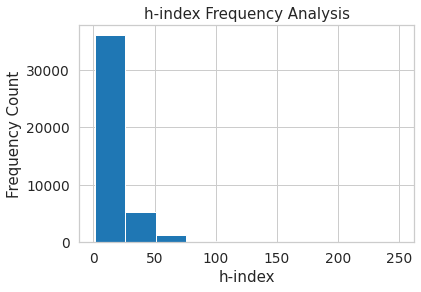

In [0]:
# Frequency analysis of h-index
authors_df['h-index'].hist()
plt.xlabel('h-index')
plt.ylabel('Frequency Count')
plt.title('h-index Frequency Analysis')


*   **Citations**

    Citations is the sum of the citation count gained by an author in each publication. This value signifies the cited by feature. The total citations represents the worth, fame and quality of any author's contribution in research field. The increase in citation in any publication can increase the h-index of the author. Thus, citations is directly proportional to the h-index.

    Findings:
    1.   Around 39000 authors  have 25000 or less total citations
    2.   Authors with atmost 250000 citations even exist in the data
    3.   Sudden decrease in author's count is observed when total citation becomes greater than 25000

Text(0.5, 1.0, 'Citations Frequency Analysis')

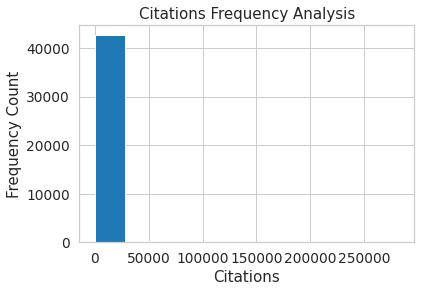

In [0]:
# Citations frequency analysis
authors_df['citations'].hist()
plt.xlabel('Citations')
plt.ylabel('Frequency Count')
plt.title('Citations Frequency Analysis')


*   **Number of Publications**

    Number of Publications is the total number of publications pulished by an author. It represents the quantity of work published by an author. It is obvious that, with the increase in number of publications, the total citation counts is subject to increase and so is the h-index of an author.

    Findings:
    1.   More than 35000 authors have around 250 publication count
    2.   Authors with atmost 3000 publications even exist in the data
    3.   Sudden decrease in author's count is observed when publication count becomes greater than 250

Text(0.5, 1.0, 'Publications Frequency Analysis')

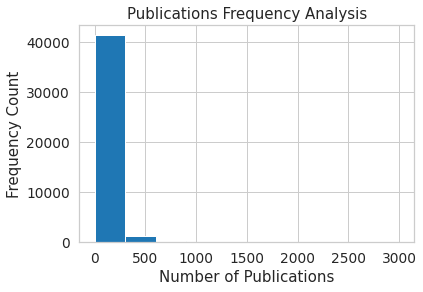

In [0]:
# Publications frequency analysis
authors_df['number_of_publication'].hist()
plt.xlabel('Number of Publications')
plt.ylabel('Frequency Count')
plt.title('Publications Frequency Analysis')

*   **Years Since First Publication**

    Years Since First Publication is the number of years ago from now when the author's first publcaition was published in Google Scholar. It represents thenumber of years contributed in research field by an author. It is assumed that when the years count of an author increases and that the author is agile in research, the increase in number of publications, so the total citation counts and the h-index of an author should be noticed.

    Findings:
    1.   More than 25000 authors have around 20 year count
    2.   Authors with atmost 200 year count even exist in the data
    3.   Moderate decrease in author's count is observed from 20 years onwards

Text(0.5, 1.0, 'Years Frequency Analysis')

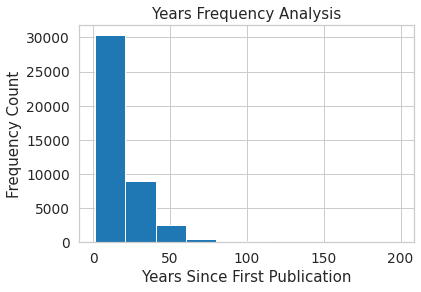

In [0]:
authors_df['year_since_first_publication'].hist()
plt.xlabel('Years Since First Publication')
plt.ylabel('Frequency Count')
plt.title('Years Frequency Analysis')



### **Rank Distribution**



The pandas boxplots are used to visualize distributions. It is very useful when comparing data between two groups. 

Boxplot captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. It summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile. The advantage of comparing quartiles is that they are not influenced by outliers. Sometimes a boxplot is named a *box-and-whisker plot*. 

Text(0.5, 1.0, 'Rank Distribution Analysis')

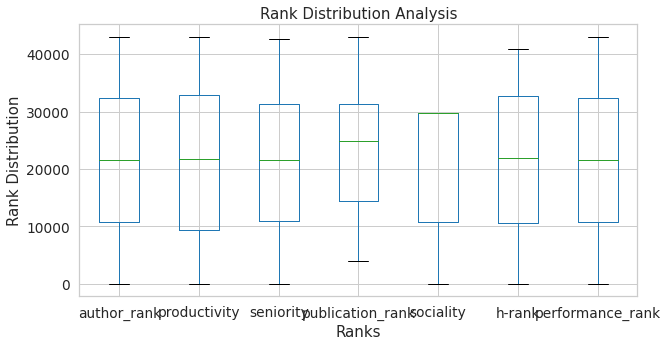

In [0]:
# Visualising rank distribution
authors_df.boxplot(column=['author_rank', 'productivity', 'seniority', 'publication_rank','sociality', "h-rank","performance_rank"],figsize= (10,5))
plt.xlabel('Ranks')
plt.ylabel('Rank Distribution')
plt.title('Rank Distribution Analysis')



### **Highly Impacted Research Domain via WordCloud and Topic Modeling (LDA)**

A highly impacted research domain is a field in which majority of researchers are practicing. This research domain can be easily interpreted as the trending research area of recent times. This research domain has a larger part of research topics to be explored on.

The *research_domain* field in our dataset consists of expertise research areas of the respective authors. From those field, we can draw to the most encountered research area or topic.



**Removing Special Characters through Regular Expression**




These research domains are refined by a regular expression which removes special characters and converts the alphabetical letters into lower case.



In [0]:
# Refining research domains by removing special characters and converting all letter to lower case and adding a new column to datset
authors_df['processed_research_domain'] = authors_df['research_domain'].map(lambda x: re.sub('[,\.!?]', '', x))
authors_df['processed_research_domain'] = authors_df['processed_research_domain'].map(lambda x: x.lower())

<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<ipython-input-71-d23bdaf0af7e>:1: DeprecationWarning: invalid escape sequence \.
  authors_df['processed_research_domain'] = authors_df['research_domain'].map(lambda x: re.sub('[,\.!?]', '', x))


**Trending Research Domain through Word Cloud**

Python has a built-in library `wordcloud` that provides the functionality of the `WordCloud()` class that takes the strings of the words to be generated in the word cloud. The `max_words` attribute takes the maximum number of words to be represented in the word cloud.

In [0]:
# Creating a word cloud for the research domains in the data
long_string = ','.join(list(authors_df['processed_research_domain'].values))
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue',width=800, height=400)
wordcloud.generate(long_string)

The above generated word cloud can be visualized by transforming it into an image. 

Research domain word cloud is a creative visualization of words typically associated with research domians data. The commonly words from this data is highlight as ***popular or trending terms based on frequency of use and prominence.*** 

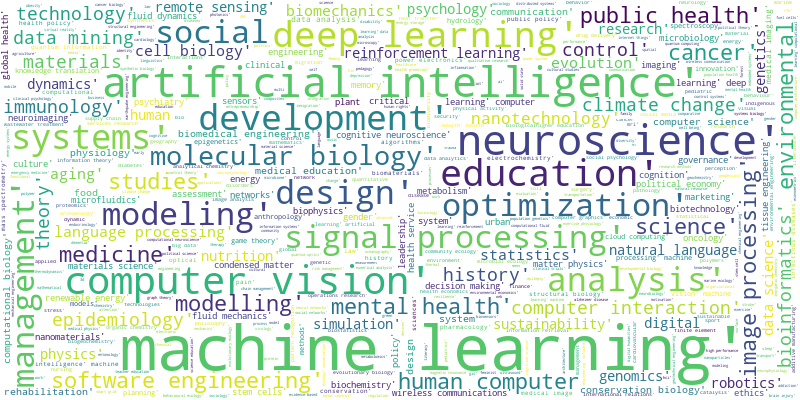

In [0]:
# Plotting the created word cloud
wordcloud.to_image()

**Frequency Analysis of Trending Research Domain**

Frequency analysis approach is performed on the top 10 highligted popular reserach domain of the word cloud. With this, frequency of occurence of such research areas is known.

The bar plot shows the count of top 10 trending research domains.



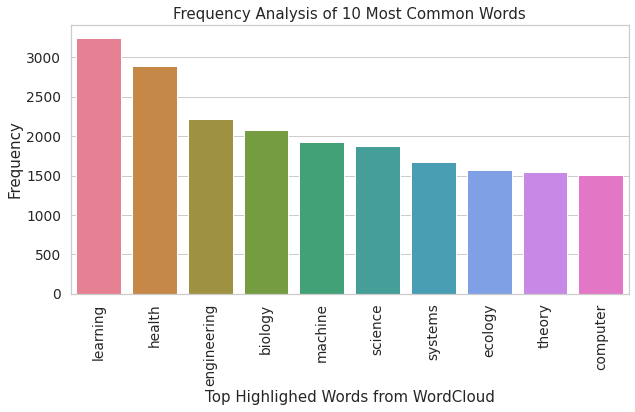

In [0]:
# Frequency analysis for top 10 trending research domains found in word cloud
sns.set_style('whitegrid')
%matplotlib inline

def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(10, 8/1.6180))
    plt.subplot(title='Frequency Analysis of 10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('Top Highlighed Words from WordCloud')
    plt.ylabel('Frequency')
    plt.show()
    
    
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(authors_df['processed_research_domain'])
plot_10_most_common_words(count_data, count_vectorizer)

## **Topic Modeling**

Topic Model is a type of statistical language model used for uncovering hidden structure in a collection of texts. 

Topic Modeling is an unsupervised learning algorithm especially used for text classification. In topic modeling, clusters of words are bulit.  ***A text is thus a mixture of all the topics, each having a specific weight.*** It uses **Tagging** by classifcation of texts into abstract “topics” that occur in a collection of documents that best represents the information in them.

Latent Dirichlet Allocation (LDA) is one of the topic modeling algorithm which we have implemented here.

### ***Latent Dirichlet Allocation***

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

The main idea behind LDA is 



> *Each document can be described by a distribution of topics and each topic can be described by a distribution of words*



**Parameters of LDA**

***Alpha parameter*** is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.

***Beta parameter*** is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

LDA works based on following hypothesis:

![LDA](https://drive.google.com/uc?id=1eXdA4scCUx7ClKrzJ-gRMZJLoDHxPk5_)

In [0]:
warnings.simplefilter("ignore", DeprecationWarning)

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 7
number_words = 8

# Creating and fiting the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
health psychology economics social research public epidemiology care

Topic #1:
physics change science climate environmental philosophy medical geology

Topic #2:
education studies theory quantum history political international social

Topic #3:
biology ecology cancer molecular genetics cell genomics physiology

Topic #4:
neuroscience energy control dynamics mechanics engineering fluid analysis

Topic #5:
learning machine computer data processing intelligence systems artificial

Topic #6:
engineering chemistry theory systems software materials food power


**Analyzing LDA model results**

To visualize the topics for interpretability, we’ll use a popular visualization package, **`pyLDAvis`** which is designed to help interactively with:

1.  Better understanding and interpreting individual topics

  We can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help us when trying to assign a human interpretable name or “meaning” to each topic.

2.  Better understanding the relationships between the topics.

 Exploring the Intertopic Distance Plot helps to learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [0]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

In [0]:
IPython.display.HTML(filename='/content/ldavis_prepared_7.html')

### **Correlation Coefficiency**

There may be complex and unknown relationships between the variables in the dataset.

It is important to discover and quantify the degree to which variables are dependent upon each other. This knowledge helps in better preparing the data to meet the expectations of machine learning algorithms.

Covariance and correlation are two mathematical concepts which are commonly used in statistics. When comparing data samples, covariance is used to determine how much two random variables vary together, whereas correlation is used to determine when can a change in one variable can result in a change in another. Both covariance and correlation measure linear relationships between variables.



>**Covariance**


Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples. This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

Covariance can be calculated as follows:

*cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)*

The `cov()` NumPy function can be used to calculate a covariance matrix between two or more variables. The diagonal of the matrix represents the covariance between two variables.

*covariance = cov(data1, data2)*


In [0]:
# Calculating covariance
c1 = np.cov(authors_df['h-index'],authors_df['average_citations'])
c2 = np.cov(authors_df['h-index'],authors_df['number_of_publication'])
c3 = np.cov(authors_df['h-index'],authors_df['number_of_coauthors'])
c4 = np.cov(authors_df['h-index'],authors_df['year_since_first_publication'])
c5 = np.cov(authors_df['h-index'],authors_df['m-factor'])
c6 = np.cov(authors_df['h-index'],authors_df['average_publications'])
c7 = np.cov(authors_df['h-index'],authors_df['citations'])
c8 = np.cov(authors_df['h-index'],authors_df['i10-index'])
c9 = np.cov(authors_df['h-index'],authors_df['i10-index_since_last_five_years'])
c10 = np.cov(authors_df['h-index'],authors_df['h-index_since_last_five_years'])
c11 = np.cov(authors_df['h-index'],authors_df['citations_last_five_years'])
c12 = np.cov(authors_df['h-rank'],authors_df['performance_rank'])
c13 = np.cov(authors_df['h-rank'],authors_df['author_rank'])
c14 = np.cov(authors_df['h-rank'],authors_df['seniority'])
c15 = np.cov(authors_df['h-rank'],authors_df['publication_rank'])
c16 = np.cov(authors_df['h-rank'],authors_df['sociality'])
c17 = np.cov(authors_df['h-rank'],authors_df['productivity'])
c18 = np.cov(authors_df['h-index'],authors_df['performance_factor'])


> **Correlation**

The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease.  Correlation can also be neural or zero, meaning that the variables are unrelated.

**Positive Correlation**: Both variables change in the same direction

**Neutral Correlation**: No relationship in the change of the variables

**Negative Correlation**: Variables change in opposite directions

* **Pearson’s Correlation**

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

*Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))*

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The `pearsonr()` SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.

In [0]:
# Calculating Pearson Correlation
corr1, _ = pearsonr(authors_df['h-index'], authors_df['average_citations'])
corr2, _ = pearsonr(authors_df['h-index'], authors_df['number_of_publication'])
corr3, _ = pearsonr(authors_df['h-index'], authors_df['number_of_coauthors'])
corr4, _ = pearsonr(authors_df['h-index'], authors_df['year_since_first_publication'])
corr5, _ = pearsonr(authors_df['h-index'], authors_df['m-factor'])
corr6, _ = pearsonr(authors_df['h-index'],authors_df['average_publications'])
corr7, _ = pearsonr(authors_df['h-index'],authors_df['citations'])
corr8, _ = pearsonr(authors_df['h-index'],authors_df['i10-index'])
corr9, _ = pearsonr(authors_df['h-index'],authors_df['i10-index_since_last_five_years'])
corr10, _ = pearsonr(authors_df['h-index'],authors_df['h-index_since_last_five_years'])
corr11, _ = pearsonr(authors_df['h-index'],authors_df['citations_last_five_years'])
corr12, _ = pearsonr(authors_df['h-rank'],authors_df['performance_rank'])
corr13, _ = pearsonr(authors_df['h-rank'],authors_df['author_rank'])
corr14, _ = pearsonr(authors_df['h-rank'],authors_df['seniority'])
corr15, _ = pearsonr(authors_df['h-rank'],authors_df['publication_rank'])
corr16, _ = pearsonr(authors_df['h-rank'],authors_df['sociality'])
corr17, _ = pearsonr(authors_df['h-rank'],authors_df['productivity'])
corr18, _ = pearsonr(authors_df['h-index'],authors_df['performance_factor'])

The covariance and correlation between h-index (Predicting Variable) and all other variables of the data are calculated to determine the linear relationship between them. 



The above computed correlation coefficients can be represented with a table using `prettytable` library in Python. This library provides a `PrettyTable` function that creates a table. The columns are added using `field_names` attribute and instances are added using `add_row`.

The correlation table is sorted so as to get the maximum correlated variables at the top. The maximum correlated variable would have the scope in the feature vector that predicts h-index.

In [0]:
# Creating Correlation Table with respect to h-index
x = PrettyTable()
x.field_names = ["Factor 1", "Factor 2", "Covariance", "Pearson Correlation"]

x.add_row(["h-index", "Citations", c7[0][1], corr7])
x.add_row(["h-index", "Citations Since Last Five Years", c11[0][1], corr11])
x.add_row(["h-index", "Average Citations", c1[0][1], corr1])
x.add_row(["h-index", "Number of Publications", c2[0][1], corr2])
x.add_row(["h-index", "i10-index", c8[0][1], corr8])
x.add_row(["h-index", "i10-index Since Last Five Years", c9[0][1], corr9])
x.add_row(["h-index", "Years Since First Publication", c4[0][1], corr4])
x.add_row(["h-index", "h-index Since Last Five Years", c10[0][1], corr10])
x.add_row(["h-index", "Average Publications", c6[0][1], corr6])
x.add_row(["h-index", "Number of Co-authors", c3[0][1], corr3])
x.add_row(["h-index", "m-factor", c5[0][1], corr5])
x.add_row(["h-index", "Performance Factor", c18[0][1], corr18])

x.sortby = "Pearson Correlation"
x.reversesort=True

print(x.get_string(title="h-index Correlation Table"))

+----------+---------------------------------+--------------------+---------------------+
| Factor 1 |             Factor 2            |     Covariance     | Pearson Correlation |
+----------+---------------------------------+--------------------+---------------------+
| h-index  |  h-index Since Last Five Years  | 164.58257903093264 |  0.9607440576922899 |
| h-index  |            i10-index            | 790.8842627316964  |  0.8779306476326215 |
| h-index  | i10-index Since Last Five Years | 530.4679987767098  |  0.8675029637517223 |
| h-index  |            Citations            | 88413.15850663741  |  0.7808037108322413 |
| h-index  |        Average Citations        | 2070.9905681325113 |  0.7204935198335436 |
| h-index  |      Number of Publications     | 1809.3467150705546 |  0.708839057526873  |
| h-index  | Citations Since Last Five Years | 38079.24142803393  |  0.7082622014893843 |
| h-index  |       Average Publications      | 36.76607548867696  |  0.6669863778144343 |
| h-index 

The covariance and correlation for the ranks are calculated with respect to h-rank (rank of h-index) to make sense between the correlationship.

In [0]:
# Creating Correlation table with respect to h-rank
x1 = PrettyTable()
x1.field_names = ["Factor 1", "Factor 2", "Covariance", "Pearson Correlation"]

x1.add_row(["h-rank", "Performance Rank", c12[0][1], corr12])
x1.add_row(["h-rank", "Author Rank", c13[0][1], corr13])
x1.add_row(["h-rank", "Publication Rank", c15[0][1], corr15])
x1.add_row(["h-rank", "Seniority", c14[0][1], corr14])
x1.add_row(["h-rank", "Sociality", c16[0][1], corr16])
x1.add_row(["h-rank", "Productivity", c17[0][1], corr17])

x1.sortby = "Pearson Correlation"
x1.reversesort=True

print(x1.get_string(title="h-rank Correlation Table"))

+----------+------------------+--------------------+---------------------+
| Factor 1 |     Factor 2     |     Covariance     | Pearson Correlation |
+----------+------------------+--------------------+---------------------+
|  h-rank  |   Author Rank    | 139493290.4673235  |  0.9059048168510726 |
|  h-rank  |    Seniority     | 123166966.98954464 |  0.8003765946939836 |
|  h-rank  |   Productivity   | 46126781.33047775  |  0.2996905583027525 |
|  h-rank  |    Sociality     | 33683816.402152814 |  0.2498713770537086 |
|  h-rank  | Publication Rank | -99719832.77685878 | -0.6612128169914251 |
|  h-rank  | Performance Rank | -140798066.4110334 | -0.9143690003948652 |
+----------+------------------+--------------------+---------------------+



### **Correlation Heatmap**

 The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.

 Seaborn library provides a high-level data visualization interface to draw the matrix. This matrix is visualized through heatmap.



The below heatmap provides the correlation of *h-index* with every other variable in the data except the ranks. This is because the correlation of a value can't be compared with a rank.

It is noticed from the heatmap, that the maximum correlation of h-index (i.e correlation coefficiency > 0.5) is with **h-index since last five years, i10-index, i10-index since last five years, citations, average citation, number of publications, average publications and years since first publication**. The lowest correlation is observed with the number of coauthors and the m-factor.

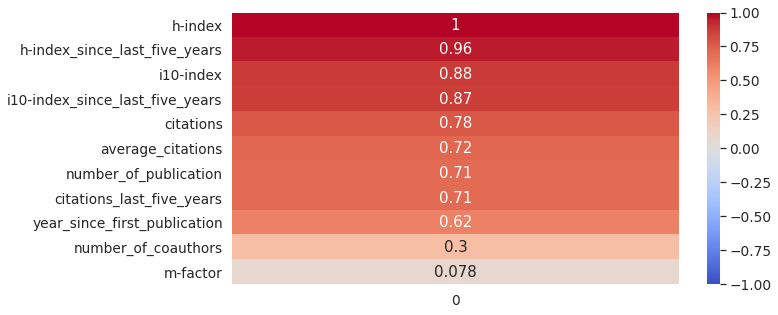

In [0]:
# Visualizing HeatMap with respect to h-index
correlations_df = DataFrame()
col = ['h-index', 'h-index_since_last_five_years', 'citations','citations_last_five_years', 'average_citations', 'average_publications','number_of_publication', 
                 'number_of_coauthors','i10-index','i10-index_since_last_five_years','year_since_first_publication', 'm-factor']
                 
for column in authors_df.columns:
    for ele in col:
        if column == ele:
            correlations_df[column] = authors_df[column]

correlations = correlations_df.corrwith(authors_df['h-index']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax )

As mentioned earlier, a numerical value can't be correlated with the rank. Hence, the rank correlations can be mapped between the h-rank (rank given to h-index) with all other ranks including author rank, publication rank, seniority, sociality, productivity and the performance rank.

The h-rank is maximum positively correlated with the **author rank, seniority, and publication rank**. These ranks are more likely to be considered for feature vector in predicting h-index.


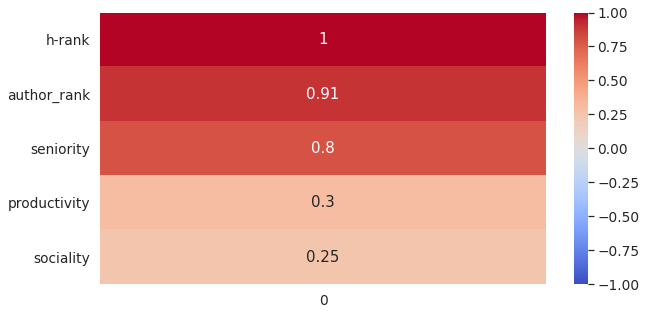

In [0]:
# Visualizing HeatMap with respect to h-rank
ranks_df = DataFrame()
col = ['publication_rank','h-rank', 'author_rank', 'seniority', 'sociality', 'productivity']
                 
for column in authors_df.columns:
    for ele in col:
        if column == ele:
            ranks_df[column] = authors_df[column]

correlations = ranks_df.corrwith(authors_df['h-rank']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax )

### **Exploring Relationship of h-index**

The pair plot imported from the seaborn library plots the pairwise relationship between the variables. It is often called as, a scatterplot matrix.

A pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for analysis.

The below scatter pair plot is for h-index with the citations, number of publications, years since first publication and the i10-index. These are the variables on which h-index is highly dependent in consideration with correlation coefficiency.


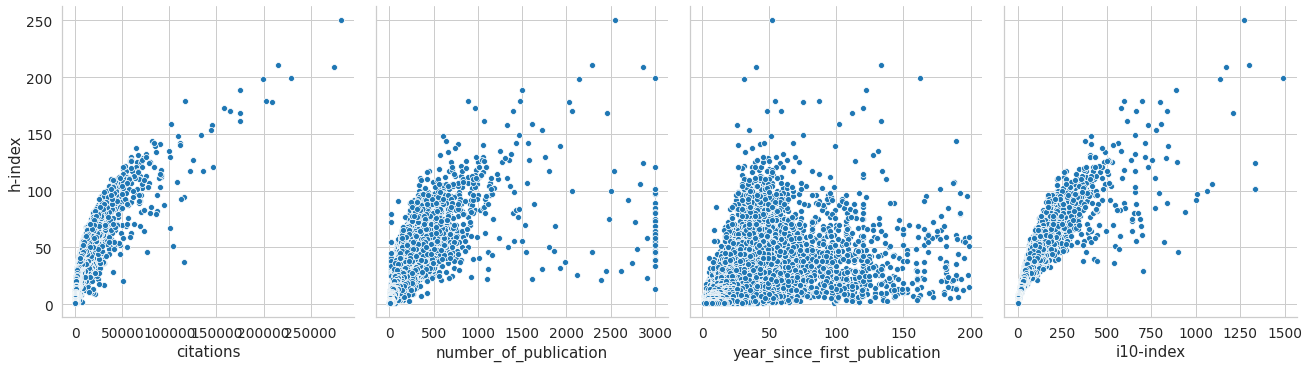

In [0]:
# Visualizing scatter pair plot with respect to h-index
sns.pairplot(authors_df, x_vars=["citations","number_of_publication", "year_since_first_publication", "i10-index" ], y_vars=["h-index"],height=5, aspect=.9, kind="scatter");

This is another pair plot of h-index with other variables which have correlation coeffiecient > 0.5 with h-index. Such variables are average citation, average publications, citations since last five years, h-index since last five years and i10-index since last five years.

The ultimate goal is to analyse the trends in data samples with the predicting variable. Through visualizing this trends, feature engineering becomes uncomplicated and effortless.

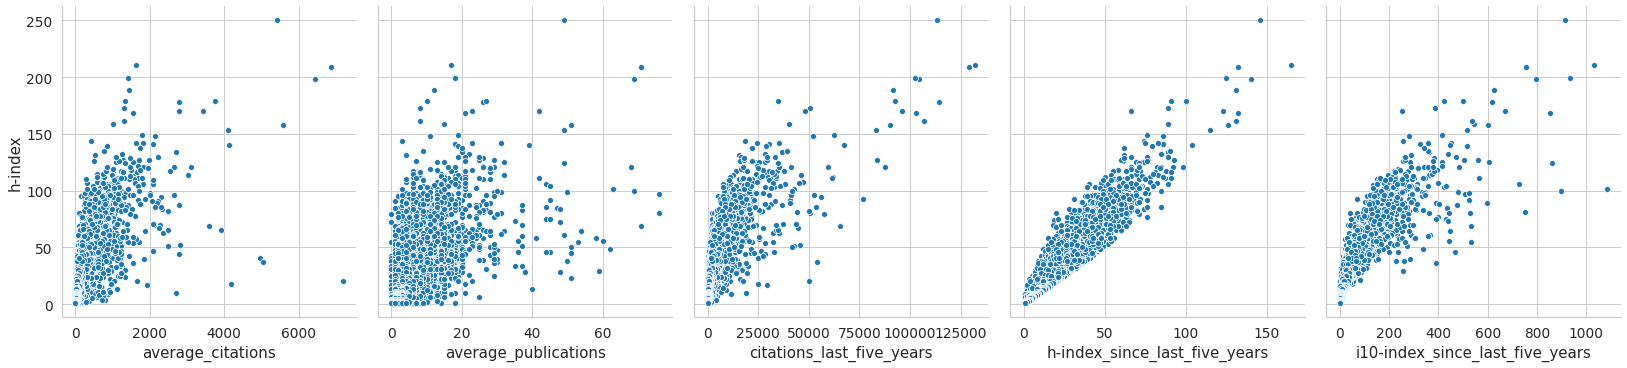

In [0]:
# Visualizing scatter pair plot with respect to h-index
sns.pairplot(authors_df, x_vars=['average_citations', 
                                 'average_publications', 'citations_last_five_years', 'h-index_since_last_five_years', 'i10-index_since_last_five_years'], y_vars=["h-index"],height=5, aspect=.9, kind="scatter");

A positive linear relationship is revealed for the h-index with the ***h-index since last five years, citations, average citations, citations since last five years, i10-index, i10-index since last five years, number of publications, average publications, and years since first publication*** in all the above scatter pair plots.

When considering rank columns of the data, author rank, publication rank, and seniority have correlation coeffieciency > 0.5 with h-rank. 

The scatter pair plot of these three variables with the h-index is plotted below.




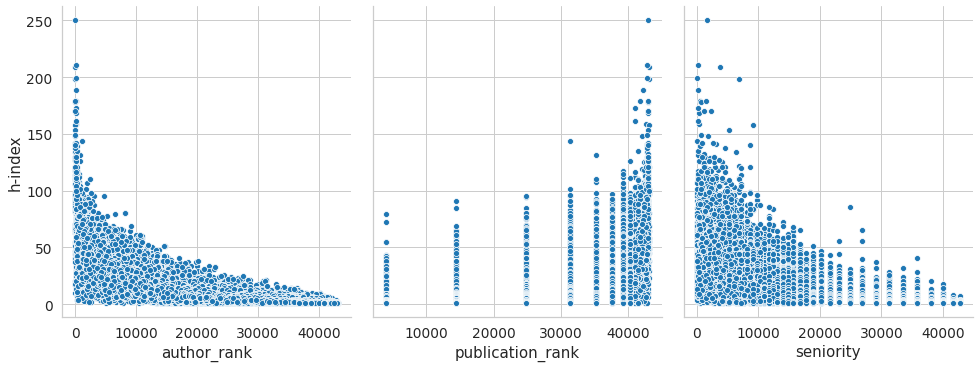

In [0]:
# Visualizing scatter pair plot with respect to h-index
sns.pairplot(authors_df, x_vars=["author_rank", "publication_rank", "seniority" ], y_vars=["h-index"],height=5, aspect=.9, kind="scatter");

# **MODEL PLANNING**


---



Model Planning is the phase of data analytics life cycle where the real fun begins. At this stage, Machine Learning Algorithms assists in going a step forward to get the insights and predicting future trends.

The main focus at this moment is on relationships between variables. These relationships will help to further understand the problem domain and searching the best fit solution. The unbiased view is extremely valuable in this phase. 

Data scientists like us can translate hunches into actual correlations between inputs and outcomes. They identify candidate predictors and outcomes, all within the framework of the business problem.



> ## **Feature Selection**

We all may have faced the problem of identifying the related features from a set of data and removing the irrelevant or less important features which do not contribute much to our target variable in order to achieve better accuracy for our model.

Feature Selection is the process of manually selecting those features which contribute most to the prediction variable or output of interest.

***Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model.*** The data features used to train machine learning models have a huge influence on the performance achieved. Irrelevant or partially relevant features negatively effects model performance.

There are three different techniques for feature selection:

1. Univariate Selection - It is a statistical test that is can be used to select those features that have the strongest relationship with the output variable.
2. Feature Importance - Feature importance gives a score for each feature of the data, the higher the score more important or relevant is the feature towards the prediction variable.
3. Correlation Heatmap - Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)









**Correlation Heatmap**

Correlation Heatmap is visualised below. The only reason beind chosing third technique is, visualization is an effective way to communicate both abstract and concrete ideas since the dawn of humanity.






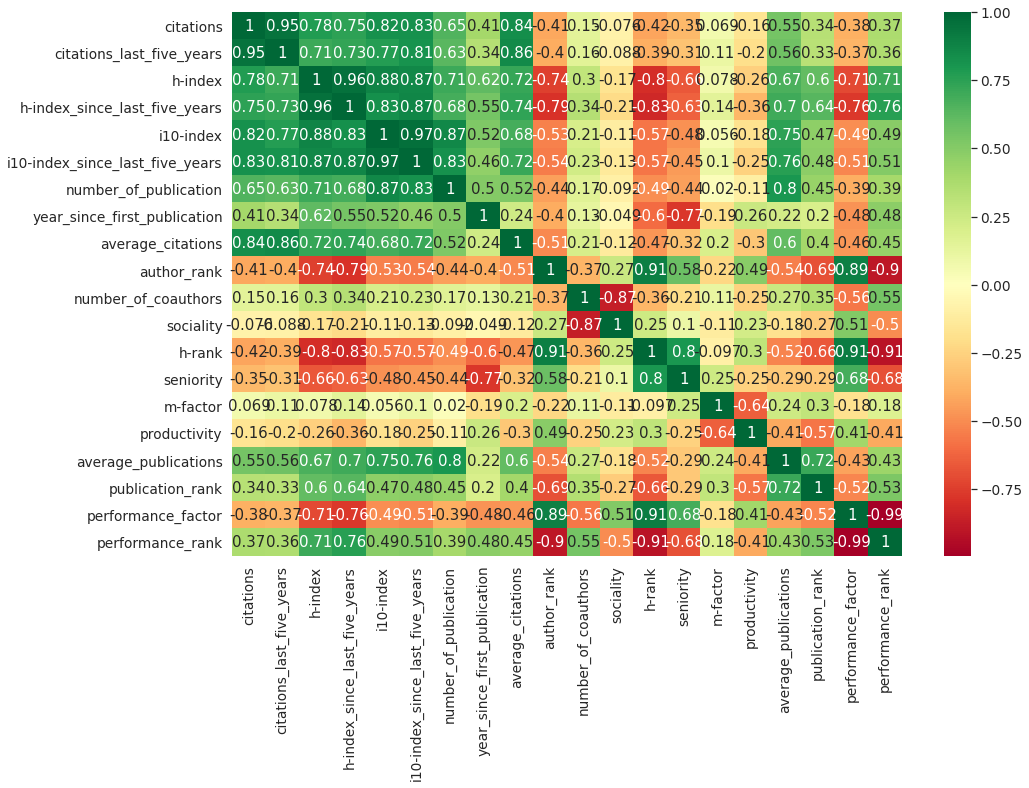

In [0]:
# Get correlations of each features in dataset
corrmat = authors_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))

# Plot heat map
g=sns.heatmap(authors_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Highly correlated variables with h-index are -


*   i10-index
*   Citations
*   Performance Rank
*   Average Citations
*   Average Publication
*   Number of Publications
*   Years Since First Publication
*   Citations Since Last Five Years
*   h-index Since Last Five Years
*   i10-index Since Last Five Years

These variables are termed as ***informative features*** to predict the h-index. 

However, h-index Since Last Five Years can't be taken in consideration as it is a dependent variable for the prediction of h-index.

When comparing correlation coefficiency of the multiple informative features, 

1.  Citation > Average Citations > Citations Since Last Five Years
2.  i10-index > i10-index Since Last Five Years
3.  Number of Publications > Average Publications
4.  Years Since First Publication
5.  Performance Rank

To summarize, feature vector = [ i10-index, Citation, Number of Publications, Year Since First Publication, Performance Rank ]

In [0]:
# Desinging the feature vector
feature_vector = ['i10-index','citations','number_of_publication','year_since_first_publication','performance_rank']



> ## **Choosing the Right Estimator**

The hardest part of solving a machine learning problem is finding the right estimator for the it.

Different estimators are better suited for different types of data and different problems.

The following scikit-learn cheat sheet is used to find the best estimator:

![Scikit-Learn Cheat Sheet](https://drive.google.com/uc?id=1BoFqAnOfRoBqeS-Qv00ehCximL_BN5Vm)

We know that predicting h-index is like predicting a quantity. So, ***Regression*** is the right estimator to solve our machine learning problem. On the other hand, to solve the regression problem, there are different machine learning algorithms available.











> ## **Unseen and Seen Dataframe**

During model testing, the model is also required to be tested on new unseen data. For this, the author's dataframe is splitted into two dataframes - Seen and Unseen. 

Seen Dataframe will be fed to the model for training and testing. And, unseen dataframe will act as a new unseen data to be fed into the model.


In [0]:
# Splitting into seen and unseen data
unseen_df = authors_df.iloc[0:3800]
authors_df = authors_df.iloc[3801:43306]

# Resetting the index of the unseen dataframe
unseen_df.reset_index(drop=False, inplace=True)
unseen_df = unseen_df.drop(columns=['index'])



> ## **Dependent and Independent Variable**

The dependent variable is the *h-index*, which is often called as prediction variable. 

The prediction variable is dependent on various other variables of the data. The dependencies are of course the positive correlation coefficiency.

The independent variable is the *feature vector* designed above. It is sometimes called as Predictor Variables. The variables in the feature vector are said to have ***higher predictive power***.



In [0]:
# Independent/Predictor Variable
X = authors_df[feature_vector]
X_unseen = unseen_df[feature_vector]

# Dependent/Prediction Variable
y = authors_df['h-index']
y_unseen = unseen_df['h-index']

**Visualizing Feature Vector with Prediction Variable**

The below pair plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.


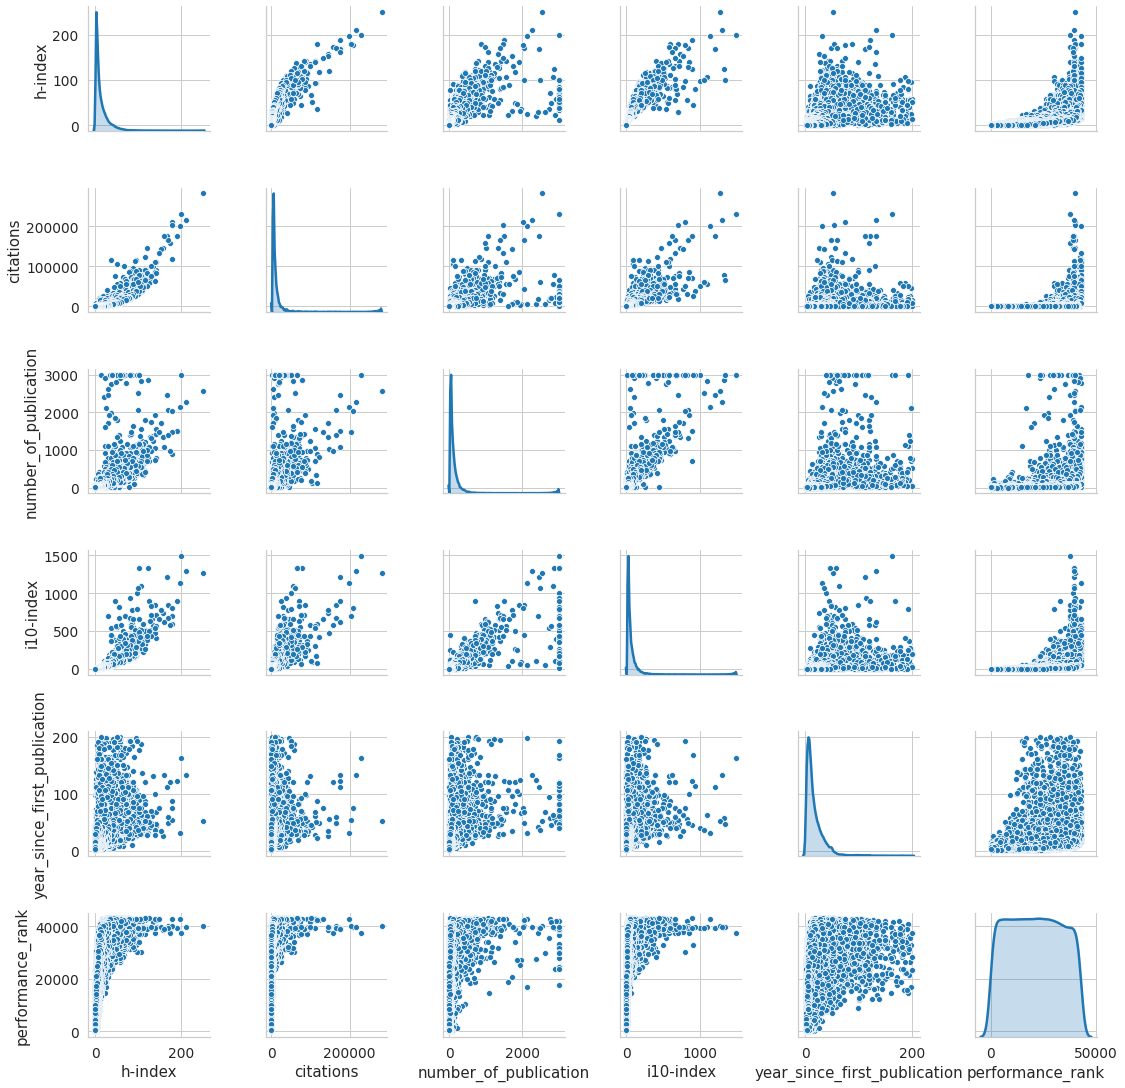

In [0]:
# pair plot for the training data
sns.pairplot(authors_df[['h-index','citations','number_of_publication','i10-index','year_since_first_publication','performance_rank']], diag_kind="kde")



> ## **Train and Test Data**

In machine learning data is usually split into two subsets: training data and testing data (and sometimes: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. 

The training set contains a known output and the model learns on this data in order to be generalized on test and new data. The test dataset tests the model’s prediction accuracy/power.

In scikit learn, the `model_selection` library provides the `train_test_split` function which splits the dataset into training and testing data. The `test_size` inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30. The `shuffle=True` shuffles the dataset before splitting. 



In [0]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# **MODEL BUILDING**


---



Building machine learning models that have the ability to generalize well on future data requires thoughtful consideration of the data at hand and of assumptions about various available training algorithms. 

### **REGRESSION ALGORITHM**

Regression Algorithms are the Supervised Learning Algorithms with a continuous output variable.

Regression searches for relationships among variables.

For example, in our problem, we need to predict h-index of any author. h-index is a quantity/number which is dependent on many other feature of any author such as citation count, years contributed in the research field, number of publications published, and so on.

This is a regression problem where data related to each author represent one observation. The presumption is that the citation countof the author, years contributed in the research field, number of publications published, i10-index of author are the independent features, while the h-index depends on them.

Regression problems usually have one continuous and unbounded variable . The inputs, however, are often continuous, discrete, or maybe categorical data like gender, research domain research venue, and so on.

It is a standard practice to denote the outputs with 𝑦 and inputs with 𝑥. If there are two or more independent variables, they will be represented because the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is that the number of inputs.

Ultimate evaluation of a machine learning model’s quality requires an appropriate selection and interpretation of assessment criteria. Simple linear regression, also known as ordinary least squares (OLS) attempts to minimize the residuals. The error, in this case, is the difference between the actual value and its predicted value. 

The performance of the regression models are assessed on the basis of -

**1. Model Score**

 Score represents the accuracy of the model.

 It is usually represented between 0 to 1. When score is greater than 0.5 and nearer to 1, the model is said to have higher accuracy. Score less than o.5 are considered as lower accuracy model.

**2. R-squared (R2) Value**

 R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

 The definition of R-squared is fairly straight-forward, it is the percentage of the response variable variation that is explained by a linear model.

 R-squared = Explained variation / Total variation

 R-squared is always between 0 and 100%:

 0% indicates that the model explains none of the variability of the response data around its mean.
 100% indicates that the model explains all the variability of the response data around its mean.

 In general, the higher the R-squared, the better the model fits your data. 

**3.  Mean Absolute Error**

 Mean Absolute Error is the average of the difference between the Actual Values and the Predicted Values. It gives us the measure of how far the predictions were from the actual output. However, they don’t gives us any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data. Mathematically, it is represented as:

![Mean Absolute Error](https://drive.google.com/uc?id=1k2VW183FoBC5GMxGuFET6Dqmo0sTooVI)

**4.  Mean Squared Error**

 Mean Squared Error(MSE) is quite similar to Mean Absolute Error, the only difference being that MSE takes the average of the square of the difference between the actual values and the predicted values. The advantage of MSE being that it is easier to compute the gradient, whereas Mean Absolute Error requires complicated linear programming tools to compute the gradient. As, we take square of the error, the effect of larger errors become more pronounced then smaller error, hence the model can now focus more on the larger errors. Mathematically, it is represented as:

![Mean Square Error](https://drive.google.com/uc?id=1MqrYKMjZ_RyNlJTcdXN8XINZGq9r737r)

**5.  Root Mean Squared Error**

 It represents the square root of Mean Square Error. MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units. Mathmeatically, it is represented as:

![Root Mean Square Error](https://drive.google.com/uc?id=1vw1sIxZDGRIrpPLpCfHjML86GnAhp8Vk)




 > ## ***MultiVariate Regression***

Multivariable regression models are used to establish the linear relationship between a dependent variable (i.e. an outcome of interest) and more than 1 independent variable. It is the simplest regression algorithm. It is important to note that in a linear regression, we are trying to predict a continuous variable

A generalized equation for the multivariate regression model can be:

*y = β0 + β1.x1 + β2.x2 +….. + βn.xn*

y = Dependent Variable 
X1, X2..Xn = Independent Variable

β0 = Intercept

β1, β2..βn = Coefficients

**Intercept** - Intercept represents the slope of the curve when all the independent variables are 0.

**Coeffiecients** - Coefficients represent the correlation of Y with respective X, that means if X increase by 0.5, Y will also increaase by 0.5.

In a regression model, minimize the errors by finding the “line of best fit” — the regression line from the errors would be minimal.

The regression line fits the data points with the least possible error. The regression line fitting is seen in following graph:

![Linear Regression Model](https://drive.google.com/uc?id=1ljre81QitveBVpvjQrC1gfzb8zjEt2Ci)

The scikit learn provides a library for linear machine learning models named as `linear_model`. The `LinearRegression()` method is imported from it which creates a linear regression model and fits the training data into it using `fit()` function.

The `predict()` function is used to predict the dependent variable from the independent variable given as argument.



In [0]:
# Building Linear Regression model and fitting the train data
multilinear_regression_model = LinearRegression().fit(X_train,y_train)

# Predicting h-index from training, testing and unseen feature vector
multilinear_predict_train_y = multilinear_regression_model.predict(X_train)
multilinear_predict_test_y = multilinear_regression_model.predict(X_test)
multilinear_predict_unseen_y = multilinear_regression_model.predict(X_unseen)

The model score, r2 value, MAE and RMSE for training, testing and unseen data is computed below.

In [0]:
# Multi Linear Regression
# Training and Testing Model Score
multilinear_train_score = round(multilinear_regression_model.score(X_train, y_train),2)
multilinear_test_score = round(multilinear_regression_model.score(X_test, y_test),2)
multilinear_unseen_score = round(multilinear_regression_model.score(X_unseen, y_unseen),2)

# Model  Coeffecients and Intercept
multilinear_intercept = multilinear_regression_model.intercept_
multilinear_coef = list(zip(feature_vector, multilinear_regression_model.coef_))


# Training Prediction Accuracy
train_r2_multilinear = round(r2_score(multilinear_predict_train_y, y_train),2)
train_rmse_multilinear = round(np.sqrt(mean_squared_error(multilinear_predict_train_y, y_train)),2)
train_mae_multilinear = round(mean_absolute_error(multilinear_predict_train_y, y_train),2)

# Testing Prediction Accuracy
test_r2_multilinear = round(r2_score(multilinear_predict_test_y, y_test),2)
test_rmse_multilinear = round(np.sqrt(mean_squared_error(multilinear_predict_test_y, y_test)),2)
test_mae_multilinear = round(mean_absolute_error(multilinear_predict_test_y, y_test),2)

# Unseen Prediction Accuracy
unseen_r2_multilinear = round(r2_score(multilinear_predict_unseen_y, y_unseen),2)
unseen_rmse_multilinear = round(np.sqrt(mean_squared_error(multilinear_predict_unseen_y, y_unseen)),2)
unseen_mae_multilinear = round(mean_absolute_error(multilinear_predict_unseen_y, y_unseen),2)

Intercept: -2.0685286035984856
Coefficients: [('i10-index', 0.18895219695476748), ('citations', 0.00038203500853280003), ('number_of_publication', -0.0152736907951645), ('year_since_first_publication', 0.10730517842883963), ('performance_rank', 0.00042023648299503345)]

Train Data
Model Score: 0.9
R-squared Value: 0.89
Root Mean Square Error: 4.84


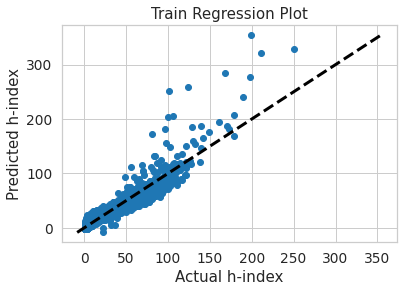

Test Data
Model Score: 0.89
R-squared Value: 0.87
Root Mean Square Error: 5.0


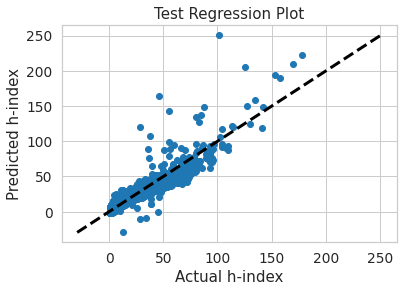

Model Score: 0.91
R-squared Value: 0.89
Root Mean Square Error: 6.84


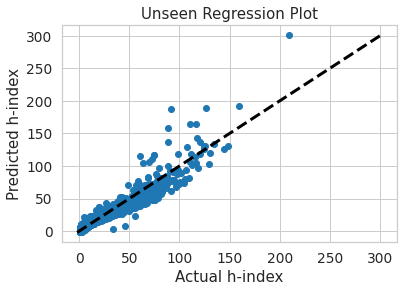

In [0]:
print('Intercept:', multilinear_intercept)
print('Coefficients:', multilinear_coef)

print("\nTrain Data")
print("Model Score:", multilinear_train_score)
print("R-squared Value:", train_r2_multilinear)
print("Root Mean Square Error:", train_rmse_multilinear)

fig, ax = plt.subplots()
ax.scatter(y_train, multilinear_predict_train_y)
ax.plot([multilinear_predict_train_y.min(), multilinear_predict_train_y.max()], [multilinear_predict_train_y.min(), multilinear_predict_train_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Train Regression Plot')
plt.show()

print("=======================")
print("Test Data")
print("Model Score:", multilinear_test_score)
print("R-squared Value:", test_r2_multilinear)
print("Root Mean Square Error:", test_rmse_multilinear)

fig, ax = plt.subplots()
ax.scatter(y_test, multilinear_predict_test_y)
ax.plot([multilinear_predict_test_y.min(), multilinear_predict_test_y.max()], [multilinear_predict_test_y.min(), multilinear_predict_test_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Test Regression Plot')
plt.show()

print("=======================")
print("Model Score:", multilinear_unseen_score)
print("R-squared Value:", unseen_r2_multilinear)
print("Root Mean Square Error:", unseen_rmse_multilinear)

fig, ax = plt.subplots()
ax.scatter(y_unseen, multilinear_predict_unseen_y)
ax.plot([multilinear_predict_unseen_y.min(), multilinear_predict_unseen_y.max()], [multilinear_predict_unseen_y.min(), multilinear_predict_unseen_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Unseen Regression Plot')
plt.show()




> ## ***Polynomial Regression***

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x)

There are some relationships that are curvilinear. Clearly, such type of cases will include a polynomial term.

**Advantages:**

1.  Broad range of function can be fit under it.
2.  Polynomial basically fits wide range of curvature.
3.  Polynomial provides the best approximation of the relationship between dependent and independent variable.


In Polynomial Regression, the feature vector is first fitted into the polynomial feature using `PolynomialFeatures()`. The `degree=3` specifies the degree of polynomial equation in which the data is fitted. The higher the degree, the better the data fits. 

Splitting of feature vector in training and testing data and fitting into the linear regression is performed as in MultiVariate Regression. Predictions are made from this model.

In [0]:
# Fitting seen and unseen feacture vector in the Polynomial Feature of degree 3
Xpoly = PolynomialFeatures(degree=3, include_bias=True).fit_transform(X)
Xpoly_unseen = PolynomialFeatures(degree=3, include_bias=True).fit_transform(X_unseen)

# Splitting polynomial feature vector
Xpoly_train, Xpoly_test, ypoly_train, ypoly_test = train_test_split(Xpoly, y, test_size=0.3, random_state=42, shuffle=True)

# Fitting training data into model
polynomial_regression_model = LinearRegression().fit(Xpoly_train,ypoly_train)

# Predicting h-index based on train, test and unseen data
polynomial_predict_train_y = polynomial_regression_model.predict(Xpoly_train)
polynomial_predict_test_y = polynomial_regression_model.predict(Xpoly_test)
polynomial_predict_unseen_y = polynomial_regression_model.predict(Xpoly_unseen)

The model score, r2 value, MAE and RMSE for training, testing and unseen data is computed below.

In [0]:
# Polynomial Regression
# Training and Testing Model Score
polynomial_train_score = round(polynomial_regression_model.score(Xpoly_train, ypoly_train),2)
polynomial_test_score = round(polynomial_regression_model.score(Xpoly_test, ypoly_test),2)
polynomial_unseen_score = round(polynomial_regression_model.score(Xpoly_unseen, y_unseen),2)

# Model  Coeffecients and Intercept
polynomial_intercept = polynomial_regression_model.intercept_
polynomial_coef = list(zip(feature_vector, polynomial_regression_model.coef_))

# Training Prediction Accuracy
train_r2_polynomial = round(r2_score(polynomial_predict_train_y, ypoly_train),2)
train_rmse_polynomial = round(np.sqrt(mean_squared_error(polynomial_predict_train_y, ypoly_train)),2)
train_mae_polynomial = round(mean_absolute_error(polynomial_predict_train_y, ypoly_train),2)

# Testing Prediction Accuracy
test_r2_polynomial = round(r2_score(polynomial_predict_test_y, ypoly_test),2)
test_rmse_polynomial = round(np.sqrt(mean_squared_error(polynomial_predict_test_y, ypoly_test)),2)
test_mae_polynomial = round(mean_absolute_error(polynomial_predict_test_y, ypoly_test),2)

# Unseen Prediction Accuracy
unseen_r2_polynomial = round(r2_score(polynomial_predict_unseen_y, y_unseen),2)
unseen_rmse_polynomial = round(np.sqrt(mean_squared_error(polynomial_predict_unseen_y, y_unseen)),2)
unseen_mae_polynomial = round(mean_absolute_error(polynomial_predict_unseen_y, y_unseen),2)

Intercept: 0.564689882960355
Coefficients: [('i10-index', 3.950565622917277e-05), ('citations', 0.4856305077575759), ('number_of_publication', -0.002055643068162208), ('year_since_first_publication', 0.0792141857893705), ('performance_rank', -0.03949072267678361)]

Train Data
Model Score: 0.98
R-squared Value: 0.98
Root Mean Square Error: 2.1


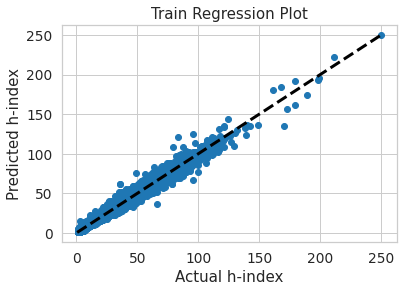

Test Data
Model Score: 0.97
R-squared Value: 0.97
Root Mean Square Error: 2.68


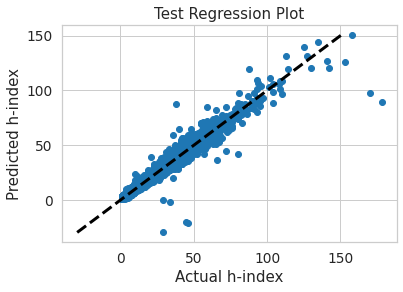

Model Score: 0.96
R-squared Value: 0.95
Root Mean Square Error: 4.69


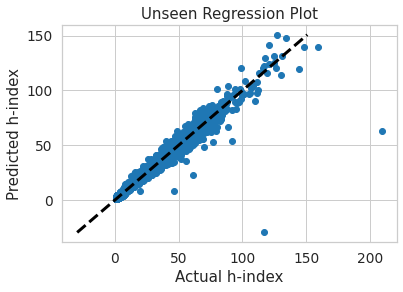

In [0]:
print('Intercept:', polynomial_intercept)
print('Coefficients:', polynomial_coef)

print("\nTrain Data")
print("Model Score:", polynomial_train_score)
print("R-squared Value:", train_r2_polynomial)
print("Root Mean Square Error:", train_rmse_polynomial)

fig, ax = plt.subplots()
ax.scatter(ypoly_train, polynomial_predict_train_y)
ax.plot([polynomial_predict_train_y.min(), polynomial_predict_train_y.max()], [polynomial_predict_train_y.min(), polynomial_predict_train_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Train Regression Plot')
plt.show()

print("=======================")
print("Test Data")
print("Model Score:", polynomial_test_score)
print("R-squared Value:", test_r2_polynomial)
print("Root Mean Square Error:", test_rmse_polynomial)

fig, ax = plt.subplots()
ax.scatter(ypoly_test, polynomial_predict_test_y)
ax.plot([polynomial_predict_test_y.min(), polynomial_predict_test_y.max()], [polynomial_predict_test_y.min(), polynomial_predict_test_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Test Regression Plot')
plt.show()

print("=======================")
print("Model Score:", polynomial_unseen_score)
print("R-squared Value:", unseen_r2_polynomial)
print("Root Mean Square Error:", unseen_rmse_polynomial)

fig, ax = plt.subplots()
ax.scatter(y_unseen, polynomial_predict_unseen_y)
ax.plot([polynomial_predict_unseen_y.min(), polynomial_predict_unseen_y.max()], [polynomial_predict_unseen_y.min(), polynomial_predict_unseen_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Unseen Regression Plot')
plt.show()



> ## ***Ridge Regression***



One common problem in any multivariate regression is the features of the data showing multi-collinearity, which is explained as predictor variables are correlated to each other and to the response variable. To picture this, our response variable — h-index, and our predictor variables would be citations, years since first publication, and number of publications. The problem here is that citations and number of pulications are also correlated and can inflate the standard error of their coefficients which may make them seem statistically insignificant.

The general solution to this is: **reduce variance at the cost of introducing some bias**. This approach is called ***regularization*** and is almost always beneficial for the predictive performance of the model.

The model complexity of Linear Regression is as:

![Model Complexity in Linear Regression](https://drive.google.com/uc?id=1yAydrVc8vnJQWoXbXDuafyLwJbo2TsRi)

As the model complexity, which in the case of linear regression can be thought of as the number of predictors increases, estimates’ variance also increases, but the bias decreases. That’s why regularization is important: to lower the variance at the cost of some bias.

The bias and the variance are desired to be low for accurate models, as large values result in poor predictions from the model. In fact, the model’s error can be decomposed into three parts: error resulting from a large variance, error resulting from significant bias, and the least error resulting from low variance.

To produce a more accurate model of complex data, a penalty term is added to the OLS/Linear equation. This penalty adds a bias towards certain values. These are known as **L2 Regularization** which is Ridge Regression.

Ridge regression uses L2 regularization which adds the following penalty term to the OLS equation.

The L2 term is equal to the square of the magnitude of the coefficients. In this case, if lambda(λ) is zero then the equation is the basic OLS, but if it is greater than zero then we add a constraint to the coefficients. This constraint leads to minimized coefficients (aka shrinkage) that trend towards zero, the larger the worth of lambda. Shrinking the coefficients results in a lower variance and successively a lower error value. Therefore, Ridge Regression decreases the complexity of a model but doesn’t reduce the amount of variables, it rather just shrinks their effect.

***Loss function = OLS + alpha * summation (squared coefficient values)***

In the above loss function, alpha is the parameter we need to select. A very low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting. 

In scikit-learn, a ridgecv regression model is constructed by using the `RidgeCV()` class. The RidgeCV class is a ridge regression with nuilt-in cross validation. Cross validation technique helps to improve the accuracy of our testing model by cross validating the model on train data. 

The first line of code below instantiates the Ridge Regression model with an `alpha=0.0001` and fits the model to the training data. The `cv=10` is the cross validation parameter, that trains the model based on below technique:

The model predictions are made on the training, testing and unseen data.




In [0]:
# Building ridge regression model and fitting train data into it
ridgecv_regression_model = RidgeCV(cv=5, alphas=(0.001,0.01,0.1,1.0) ).fit(X_train,y_train)

# Predicting h-index based on train, test and unseen data
ridgecv_predict_train_y = ridgecv_regression_model.predict(X_train)
ridgecv_predict_test_y = ridgecv_regression_model.predict(X_test)
ridgecv_predict_unseen_y = ridgecv_regression_model.predict(X_unseen)

The ridgecv regressor's model score, R2 value, and RMSE is computed for train, test and unseen data.

In [0]:
# Ridge Regression
# Training and Testing Model Score
ridgecv_train_score = round(ridgecv_regression_model.score(X_train, y_train),2)
ridgecv_test_score = round(ridgecv_regression_model.score(X_test, y_test),2)
ridgecv_unseen_score = round(ridgecv_regression_model.score(X_unseen, y_unseen),2)

# Model  Coeffecients and Intercept
ridgecv_intercept = ridgecv_regression_model.intercept_
ridgecv_coef = list(zip(feature_vector, ridgecv_regression_model.coef_))

# Training Prediction Accuracy
train_r2_ridgecv = round(r2_score(ridgecv_predict_train_y, y_train),2)
train_rmse_ridgecv = round(np.sqrt(mean_squared_error(ridgecv_predict_train_y, y_train)),2)
train_mae_ridgecv = round(mean_absolute_error(ridgecv_predict_train_y, y_train),2)

# Testing Prediction Accuracy
test_r2_ridgecv = round(r2_score(ridgecv_predict_test_y, y_test),2)
test_rmse_ridgecv = round(np.sqrt(mean_squared_error(ridgecv_predict_test_y, y_test)),2)
test_mae_ridgecv = round(mean_absolute_error(ridgecv_predict_test_y, y_test),2)

# Unseen Prediction Accuracy
unseen_r2_ridgecv = round(r2_score(ridgecv_predict_unseen_y, y_unseen),2)
unseen_rmse_ridgecv = round(np.sqrt(mean_squared_error(ridgecv_predict_unseen_y, y_unseen)),2)
unseen_mae_ridgecv = round(mean_absolute_error(ridgecv_predict_unseen_y, y_unseen),2)

Intercept: -2.0685286764156086
Coefficients: [('i10-index', 0.18895217302582695), ('citations', 0.0003820350850271756), ('number_of_publication', -0.01527368478120301), ('year_since_first_publication', 0.10730516180726796), ('performance_rank', 0.0004202365018161979)]

Train Data
Model Score: 0.9
R-squared Value: 0.89
Root Mean Square Error: 4.84


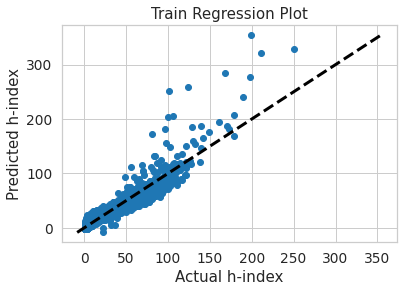

Test Data
Model Score: 0.89
R-squared Value: 0.87
Root Mean Square Error: 5.0


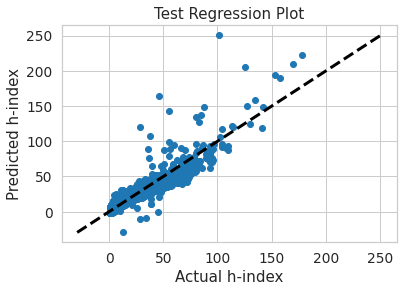

Unseen Data
Model Score: 0.91
R-squared Value: 0.89
Root Mean Square Error: 6.84


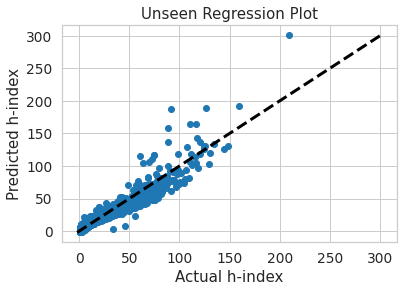

In [0]:
print('Intercept:', ridgecv_intercept)
print('Coefficients:', ridgecv_coef)

print("\nTrain Data")
print("Model Score:", ridgecv_train_score)
print("R-squared Value:", train_r2_ridgecv)
print("Root Mean Square Error:", train_rmse_ridgecv)

fig, ax = plt.subplots()
ax.scatter(y_train, ridgecv_predict_train_y)
ax.plot([ridgecv_predict_train_y.min(), ridgecv_predict_train_y.max()], [ridgecv_predict_train_y.min(), ridgecv_predict_train_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Train Regression Plot')
plt.show()

print("=======================")
print("Test Data")
print("Model Score:", ridgecv_test_score)
print("R-squared Value:", test_r2_ridgecv)
print("Root Mean Square Error:", test_rmse_ridgecv)

fig, ax = plt.subplots()
ax.scatter(y_test, ridgecv_predict_test_y)
ax.plot([ridgecv_predict_test_y.min(), ridgecv_predict_test_y.max()], [ridgecv_predict_test_y.min(), ridgecv_predict_test_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Test Regression Plot')
plt.show()

print("=======================")
print("Unseen Data")
print("Model Score:", ridgecv_unseen_score)
print("R-squared Value:", unseen_r2_ridgecv)
print("Root Mean Square Error:", unseen_rmse_ridgecv)

fig, ax = plt.subplots()
ax.scatter(y_unseen, ridgecv_predict_unseen_y)
ax.plot([ridgecv_predict_unseen_y.min(), ridgecv_predict_unseen_y.max()], [ridgecv_predict_unseen_y.min(), ridgecv_predict_unseen_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Unseen Regression Plot')
plt.show()




> ## ***Bayesian Ridge Regression***

Bayesian regression can be implemented by using regularization parameters in estimation. The BayesianRidge estimator applies Ridge regression and its coefficients to find out a posteriori estimation under the Gaussian distribution. Bayesian ridge regression allows for easy estimates of confidence intervals.

The alphas and lambdas are estimated jointly during the fit of the model. The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.



In scikit learn, `BayesianRidge()` class the instantiates the Bayesian Ridge model. The arguments `n_iter=1000` is the number of iterations for better fitting of train data, `tol=0.0001` is the precision of solution, `alpha_1` and `lambda_1` are hyperparameters which is a shape parameter for the Gamma distribution prior over the alpha and lambda parameter, and `alpha_2` and `lambda_2` are hyperparameter which is an inverse scale parameter for the Gamma distribution prior over the alpha and lambda parameter.

In [0]:
# Building Bayesian Ridge Regression and fitting train data in it
bayesianridge_regression_model = BayesianRidge(n_iter=1000, tol = 0.0001, normalize=True, lambda_1=1e-05, lambda_2=1e-06,
                                               alpha_1=1e-05, alpha_2=1e-06).fit(X_train, y_train)

# Making prediction with train, test and unseen data                                              
bayesian_predict_train_y = bayesianridge_regression_model.predict(X_train)
bayesian_predict_test_y = bayesianridge_regression_model.predict(X_test)
bayesian_predict_unseen_y = bayesianridge_regression_model.predict(X_unseen)

The model score, R2 value, amd RMSE for train, test , and unseen data is computed for Bayesian Ridge Regression  model.

In [0]:
# Bayesian Ridge Regression
# Training and Testing Model Score
bayesianridge_train_score = round(bayesianridge_regression_model.score(X_train, y_train),2)
bayesianridge_test_score = round(bayesianridge_regression_model.score(X_test, y_test),2)
bayesianridge_unseen_score = round(bayesianridge_regression_model.score(X_unseen, y_unseen),2)

# Model  Coeffecients and Intercept
bayesianridge_intercept = bayesianridge_regression_model.intercept_
bayesianridge_coef = list(zip(feature_vector, bayesianridge_regression_model.coef_))

# Training Prediction Accuracy
train_r2_bayesianridge = round(r2_score(bayesian_predict_train_y, y_train),2)
train_rmse_bayesianridge = round(np.sqrt(mean_squared_error(bayesian_predict_train_y, y_train)),2)
train_mae_bayesianridge = round(mean_absolute_error(bayesian_predict_train_y, y_train),2)

# Testing Prediction Accuracy
test_r2_bayesianridge = round(r2_score(bayesian_predict_test_y, y_test),2)
test_rmse_bayesianridge = round(np.sqrt(mean_squared_error(bayesian_predict_test_y, y_test)),2)
test_mae_bayesianridge = round(mean_absolute_error(bayesian_predict_test_y, y_test),2)

# Unseen Prediction Accuracy
unseen_r2_bayesianridge = round(r2_score(bayesian_predict_unseen_y, y_unseen),2)
unseen_rmse_bayesianridge = round(np.sqrt(mean_squared_error(bayesian_predict_unseen_y, y_unseen)),2)
unseen_mae_bayesianridge = round(mean_absolute_error(bayesian_predict_unseen_y, y_unseen),2)

Intercept: -2.0685702262521755
Coefficients: [('i10-index', 0.18889915321948156), ('citations', 0.0003821723151844092), ('number_of_publication', -0.015260128408618602), ('year_since_first_publication', 0.10730379098160547), ('performance_rank', 0.0004202450747235158)]

Train Data
Model Score: 0.9
R-squared Value: 0.89
Root Mean Square Error: 4.84


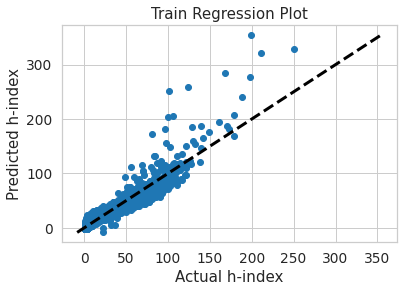

Test Data
Model Score: 0.89
R-squared Value: 0.87
Root Mean Square Error: 5.0


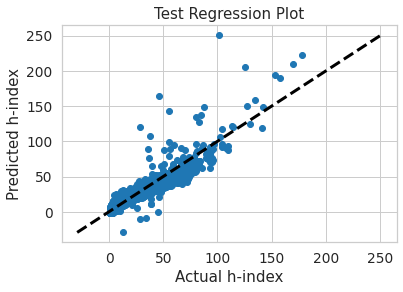

Unseen Data
Model Score: 0.91
R-squared Value: 0.89
Root Mean Square Error: 6.84


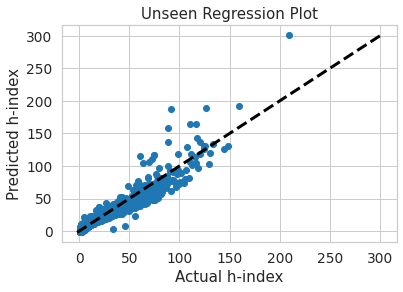

In [0]:
print('Intercept:', bayesianridge_intercept)
print('Coefficients:', bayesianridge_coef)

print("\nTrain Data")
print("Model Score:", bayesianridge_train_score)
print("R-squared Value:", train_r2_bayesianridge)
print("Root Mean Square Error:", train_rmse_bayesianridge)

fig, ax = plt.subplots()
ax.scatter(y_train, bayesian_predict_train_y)
ax.plot([bayesian_predict_train_y.min(), bayesian_predict_train_y.max()], [bayesian_predict_train_y.min(), bayesian_predict_train_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Train Regression Plot')
plt.show()

print("=======================")
print("Test Data")
print("Model Score:", bayesianridge_test_score)
print("R-squared Value:", test_r2_bayesianridge)
print("Root Mean Square Error:", test_rmse_bayesianridge)

fig, ax = plt.subplots()
ax.scatter(y_test, bayesian_predict_test_y)
ax.plot([bayesian_predict_test_y.min(), bayesian_predict_test_y.max()], [bayesian_predict_test_y.min(), bayesian_predict_test_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Test Regression Plot')
plt.show()

print("=======================")
print("Unseen Data")
print("Model Score:", bayesianridge_unseen_score)
print("R-squared Value:", unseen_r2_bayesianridge)
print("Root Mean Square Error:", unseen_rmse_bayesianridge)

fig, ax = plt.subplots()
ax.scatter(y_unseen, bayesian_predict_unseen_y)
ax.plot([bayesian_predict_unseen_y.min(), bayesian_predict_unseen_y.max()], [bayesian_predict_unseen_y.min(), bayesian_predict_unseen_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Unseen Regression Plot')
plt.show()




> ## ***Support Vector Regression***

Support Vector Regression is a support vector machine used for regression analysis.

SVR gives the flexibility to define the amount of error that is acceptable in the model and will find an appropriate line or hyperplane in higher dimensions to fit the data. It allows us to choose how tolerant errors are in our model, both through an acceptable error margin(ϵ) and through tuning our tolerance of falling outside that acceptable error rate. 

The terms that are frequently used in SVR are - 
1.  Kernel: The function used to map a lower dimensional data into a higher dimensional data. There are three types of kernel in SVR - linear, poly and rbf

2.  Hyper Plane: In SVM, hyperplane is basically the separation line between the data classes. Although in SVR this line predicts the continuous value or target value

3.  Boundary line: In SVM there are two lines other than Hyper Plane which creates a margin.  The support vectors can be on the Boundary lines or outside it. This boundary line separates the two classes. This boundary line works same in SVR.

4.  Support vectors: Support Vectors are the data points which are closest to the boundary. The distance of the points is minimum or least.

The objective function of SVR is **to minimize the coefficients** — more specifically, the l2-norm of the coefficient vector — not the squared error. The error term is instead handled in the constraints, where the absolute error less than or equal to a specified margin, called the maximum error, ϵ (epsilon). Epsilon can be tuned to gain the desired accuracy of our model. Our new objective function and constraints are as follows:
Minimize:

The simple regression minimizes the error rate while SVR **fits the error within a certain threshold**. This might be a bit confusing.

Assuming our hyper plane is a straight line going through the Y axis,

We can say that the equation of the hyper plane is,

***wx+b=0***

So we can state that the two the equation of the boundary lines are,

***wx+b=+e***

***wx+b=-e***


For any linear hyper plane the equation that satisfy our SVR is,

***e≤y-Wx-b≤+e***

This is clearly explained in following figure:

![Support Vector Regression](https://drive.google.com/uc?id=1dDez7U5ot1reNLft7yfyzvh1tcK8kS4E)


### ***SVR Kernels***


The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick.

The kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps to build a more accurate regressor.

* ***Linear Kernel*** 

 A linear kernel is used as a normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

 **K(x, xi) = sum(x * xi)**

 The linear kernel of `SVR()` class is implemented here. `C=100` is the regularization parameter. The strength of the regularization is inversely proportional to C. `epsilon=1` specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

 SVR takes high computation time due to the biased data in the feature vector. To reduce the computation time, the feature vector is standardized using `StandardScaler()` class.

 Predictions are made for train, test and unseen data through Linear SVR.

In [0]:
# Standardizing the feature vector
standardized_X = StandardScaler().fit_transform(X)
Xstd_unseen = StandardScaler().fit_transform(X_unseen)

Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(standardized_X, y, test_size=0.3, random_state=42, shuffle=True)

In [0]:
# Building Linear SVR and fitting train data into it
svr_linear_model = SVR(kernel='linear', epsilon=1, C=100).fit(Xstd_train,ystd_train)

# Predicting h-index using train, test and unseen data
svr_linear_predict_train_y = svr_linear_model.predict(Xstd_train)
svr_linear_predict_test_y = svr_linear_model.predict(Xstd_test)
svr_linear_predict_unseen_y = svr_linear_model.predict(Xstd_unseen)

The linear SVR Model Score, R2 value and RMSE is computed for train, test and unseen data.

In [0]:
# Support Vector Regression - Linear
# Training and Testing Model Score
svr_linear_train_score = round(svr_linear_model.score(Xstd_train, ystd_train),2)
svr_linear_test_score = round(svr_linear_model.score(Xstd_test, ystd_test),2)
svr_linear_unseen_score = round(svr_linear_model.score(Xstd_unseen, y_unseen),2)

# Model  Coeffecients and Intercept
svr_linear_intercept = svr_linear_model.intercept_
svr_linear_coef = list(zip(feature_vector, svr_linear_model.coef_))

# Training Prediction Accuracy
train_r2_svr_linear = round(r2_score(svr_linear_predict_train_y, ystd_train),2)
train_rmse_svr_linear = round(np.sqrt(mean_squared_error(svr_linear_predict_train_y, ystd_train)),2)
train_mae_svr_linear = round(mean_absolute_error(svr_linear_predict_train_y, ystd_train),2)

# Testing Prediction Accuracy
test_r2_svr_linear = round(r2_score(svr_linear_predict_test_y, ystd_test),2)
test_rmse_svr_linear = round(np.sqrt(mean_squared_error(svr_linear_predict_test_y, ystd_test)),2)
test_mae_svr_linear = round(mean_absolute_error(svr_linear_predict_test_y, ystd_test),2)

# Unseen Prediction Accuracy
unseen_r2_svr_linear = round(r2_score(svr_linear_predict_unseen_y, y_unseen),2)
unseen_rmse_svr_linear = round(np.sqrt(mean_squared_error(svr_linear_predict_unseen_y, y_unseen)),2)
unseen_mae_svr_linear = round(mean_absolute_error(svr_linear_predict_unseen_y, y_unseen),2)

Intercept: [13.04300268]
Coefficients: [('i10-index', array([14.89353163,  2.17818553, -0.95783128,  1.04981688,  3.13908295]))]

Train Data
Model Score: 0.8
R-squared Value: 0.86
Root Mean Square Error: 6.99


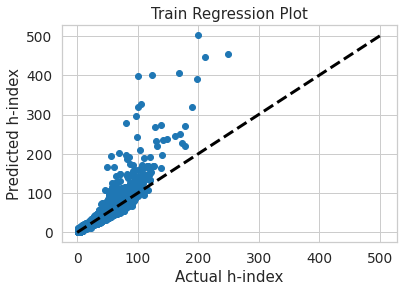

Test Data
Model Score: 0.78
R-squared Value: 0.84
Root Mean Square Error: 7.04


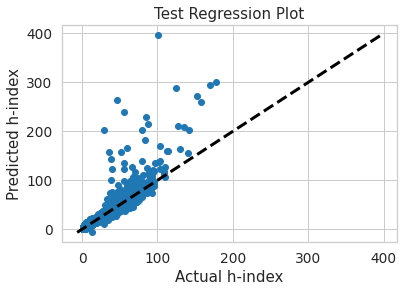

Unseen Data
Model Score: 0.75
R-squared Value: 0.63
Root Mean Square Error: 11.24


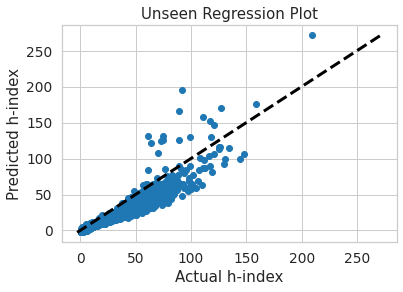

In [0]:
print('Intercept:', svr_linear_intercept)
print('Coefficients:', svr_linear_coef)

print("\nTrain Data")
print("Model Score:", svr_linear_train_score)
print("R-squared Value:", train_r2_svr_linear)
print("Root Mean Square Error:", train_rmse_svr_linear)

fig, ax = plt.subplots()
ax.scatter(y_train, svr_linear_predict_train_y)
ax.plot([svr_linear_predict_train_y.min(), svr_linear_predict_train_y.max()], [svr_linear_predict_train_y.min(), svr_linear_predict_train_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Train Regression Plot')
plt.show()

print("=======================")
print("Test Data")
print("Model Score:", svr_linear_test_score)
print("R-squared Value:", test_r2_svr_linear)
print("Root Mean Square Error:", test_rmse_svr_linear)

fig, ax = plt.subplots()
ax.scatter(y_test, svr_linear_predict_test_y)
ax.plot([svr_linear_predict_test_y.min(), svr_linear_predict_test_y.max()], [svr_linear_predict_test_y.min(), svr_linear_predict_test_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Test Regression Plot')
plt.show()

print("=======================")
print("Unseen Data")
print("Model Score:", svr_linear_unseen_score)
print("R-squared Value:", unseen_r2_svr_linear)
print("Root Mean Square Error:", unseen_rmse_svr_linear)

fig, ax = plt.subplots()
ax.scatter(y_unseen, svr_linear_predict_unseen_y)
ax.plot([svr_linear_predict_unseen_y.min(), svr_linear_predict_unseen_y.max()], [svr_linear_predict_unseen_y.min(), svr_linear_predict_unseen_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Unseen Regression Plot')
plt.show()


* ***Polynomial Kernel***

 A polynomial kernel is a more generalized form of the linear kernel. 
 
 The polynomial kernel can distinguish curved or nonlinear input space.

 **K(x,xi) = 1 + sum(x * xi)^d**
 
 where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

 The SVR of `kernel='poly'` is instantiated and training dataset is fitted into it to make the predictions for train, test and unseen data.



In [0]:
# Building SVR of polynomial kernel type and fitting standardized train data into it
svr_poly_model = SVR(kernel='poly',degree=3, epsilon=1, gamma=0.1, C=100).fit(Xstd_train,ystd_train)

# Predicting h-index for train, test and unseen data using SVR of rbf kernel type 
svr_poly_predict_train_y = svr_poly_model.predict(Xstd_train)
svr_poly_predict_test_y = svr_poly_model.predict(Xstd_test)
svr_poly_predict_unseen_y = svr_poly_model.predict(Xstd_unseen)

The Model Score, R2 value and RMSE is computed for train, test and unseen data.

In [0]:
# Support Vector Regression - Polynomial
# Training and Testing Model Score
svr_poly_train_score = round(svr_poly_model.score(Xstd_train, ystd_train),2)
svr_poly_test_score = round(svr_poly_model.score(Xstd_test, ystd_test),2)
svr_poly_unseen_score = round(svr_poly_model.score(Xstd_unseen, y_unseen),2)

# Model  Coeffecients and Intercept
svr_poly_intercept = svr_poly_model.intercept_

# Training Prediction Accuracy
train_r2_svr_poly = round(r2_score(svr_poly_predict_train_y, ystd_train),2)
train_rmse_svr_poly = round(np.sqrt(mean_squared_error(svr_poly_predict_train_y, ystd_train)),2)
train_mae_svr_poly = round(mean_absolute_error(svr_poly_predict_train_y, ystd_train),2)

# Testing Prediction Accuracy
test_r2_svr_poly = round(r2_score(svr_poly_predict_test_y, ystd_test),2)
test_rmse_svr_poly = round(np.sqrt(mean_squared_error(svr_poly_predict_test_y, ystd_test)),2)
test_mae_svr_poly = round(mean_absolute_error(svr_poly_predict_test_y, ystd_test),2)

# Unseen Prediction Accuracy
unseen_r2_svr_poly = round(r2_score(svr_poly_predict_unseen_y, y_unseen),2)
unseen_rmse_svr_poly = round(np.sqrt(mean_squared_error(svr_poly_predict_unseen_y, y_unseen)),2)
unseen_mae_svr_poly = round(mean_absolute_error(svr_poly_predict_unseen_y, y_unseen),2)

Intercept: [9.92291347]

Train Data
Model Score: 0.78
R-squared Value: 0.75
Root Mean Square Error: 7.26


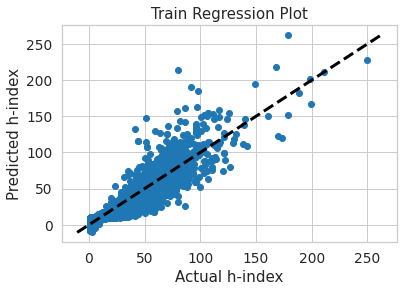

Test Data
Model Score: 0.73
R-squared Value: 0.7
Root Mean Square Error: 7.69


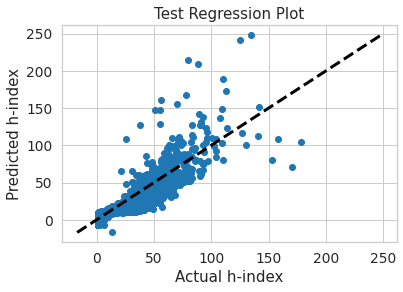

Unseen Data
Model Score: 0.31
R-squared Value: -2.16
Root Mean Square Error: 18.58


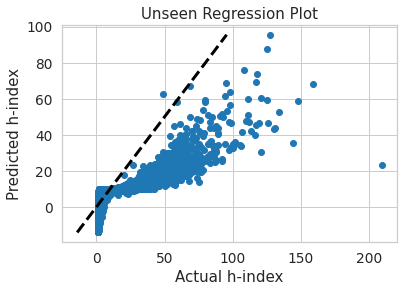

In [0]:
print('Intercept:', svr_poly_intercept)

print("\nTrain Data")
print("Model Score:", svr_poly_train_score)
print("R-squared Value:", train_r2_svr_poly)
print("Root Mean Square Error:", train_rmse_svr_poly)

fig, ax = plt.subplots()
ax.scatter(y_train, svr_poly_predict_train_y)
ax.plot([svr_poly_predict_train_y.min(), svr_poly_predict_train_y.max()], [svr_poly_predict_train_y.min(), svr_poly_predict_train_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Train Regression Plot')
plt.show()

print("=======================")
print("Test Data")
print("Model Score:", svr_poly_test_score)
print("R-squared Value:", test_r2_svr_poly)
print("Root Mean Square Error:", test_rmse_svr_poly)

fig, ax = plt.subplots()
ax.scatter(y_test, svr_poly_predict_test_y)
ax.plot([svr_poly_predict_test_y.min(), svr_poly_predict_test_y.max()], [svr_poly_predict_test_y.min(), svr_poly_predict_test_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Test Regression Plot')
plt.show()

print("=======================")
print("Unseen Data")
print("Model Score:", svr_poly_unseen_score)
print("R-squared Value:", unseen_r2_svr_poly)
print("Root Mean Square Error:", unseen_rmse_svr_poly)

fig, ax = plt.subplots()
ax.scatter(y_unseen, svr_poly_predict_unseen_y)
ax.plot([svr_poly_predict_unseen_y.min(), svr_poly_predict_unseen_y.max()], [svr_poly_predict_unseen_y.min(), svr_poly_predict_unseen_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Unseen Regression Plot')
plt.show()


* ***Radial Basis Function Kernel***

 The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. 
 
 RBF can map an input space in infinite dimensional space.

 **K(x,xi) = exp(-gamma * sum((x – xi^2))**

 Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

 The SVR of `kernel='rbf'` is instantiated and training dataset is fitted into it to make the predictions for train, test and unseen data.

In [0]:
# Building SVR of rbf kernel type and fitting standardized train data into it
svr_rbf_model = SVR(kernel='rbf',degree=3, epsilon=1, gamma=0.1, C=100).fit(Xstd_train,ystd_train)

# Predicting h-index for train, test and unseen data using SVR of rbf kernel type 
svr_rbf_predict_train_y = svr_poly_model.predict(Xstd_train)
svr_rbf_predict_test_y = svr_poly_model.predict(Xstd_test)
svr_rbf_predict_unseen_y = svr_poly_model.predict(Xstd_unseen)

The rbf kernel type SVR Model Score, R2 value and RMSE is computed for train, test and unseen data.

In [0]:
# Support Vector Regression - Polynomial
# Training and Testing Model Score
svr_rbf_train_score = round(svr_rbf_model.score(Xstd_train, ystd_train),2)
svr_rbf_test_score = round(svr_rbf_model.score(Xstd_test, ystd_test),2)
svr_rbf_unseen_score = round(svr_rbf_model.score(Xstd_unseen, y_unseen),2)

# Model  Coeffecients and Intercept
svr_rbf_intercept = svr_rbf_model.intercept_

# Training Prediction Accuracy
train_r2_svr_rbf = round(r2_score(svr_rbf_predict_train_y, ystd_train),2)
train_rmse_svr_rbf = round(np.sqrt(mean_squared_error(svr_rbf_predict_train_y, ystd_train)),2)
train_mae_svr_rbf = round(mean_absolute_error(svr_rbf_predict_train_y, ystd_train),2)

# Testing Prediction Accuracy
test_r2_svr_rbf = round(r2_score(svr_rbf_predict_test_y, ystd_test),2)
test_rmse_svr_rbf = round(np.sqrt(mean_squared_error(svr_rbf_predict_test_y, ystd_test)),2)
test_mae_svr_rbf = round(mean_absolute_error(svr_rbf_predict_test_y, ystd_test),2)

# Unseen Prediction Accuracy
unseen_r2_svr_rbf = round(r2_score(svr_rbf_predict_unseen_y, y_unseen),2)
unseen_rmse_svr_rbf = round(np.sqrt(mean_squared_error(svr_rbf_predict_unseen_y, y_unseen)),2)
unseen_mae_svr_rbf = round(mean_absolute_error(svr_rbf_predict_unseen_y, y_unseen),2)

Intercept: [83.60361102]

Train Data
Model Score: 0.99
R-squared Value: 0.75
Root Mean Square Error: 7.26


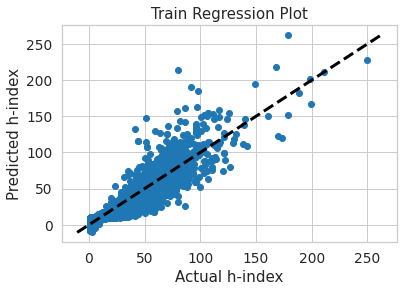

Test Data
Model Score: 0.97
R-squared Value: 0.7
Root Mean Square Error: 7.69


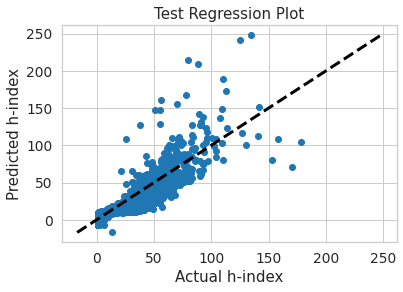

Unseen Data
Model Score: 0.8
R-squared Value: -2.16
Root Mean Square Error: 18.58


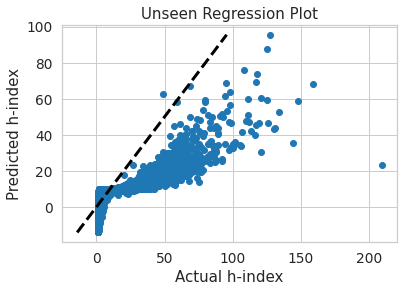

In [0]:
print('Intercept:', svr_rbf_intercept)

print("\nTrain Data")
print("Model Score:", svr_rbf_train_score)
print("R-squared Value:", train_r2_svr_rbf)
print("Root Mean Square Error:", train_rmse_svr_rbf)

fig, ax = plt.subplots()
ax.scatter(y_train, svr_rbf_predict_train_y)
ax.plot([svr_rbf_predict_train_y.min(), svr_rbf_predict_train_y.max()], [svr_rbf_predict_train_y.min(), svr_rbf_predict_train_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Train Regression Plot')
plt.show()

print("=======================")
print("Test Data")
print("Model Score:", svr_rbf_test_score)
print("R-squared Value:", test_r2_svr_rbf)
print("Root Mean Square Error:", test_rmse_svr_rbf)

fig, ax = plt.subplots()
ax.scatter(y_test, svr_rbf_predict_test_y)
ax.plot([svr_rbf_predict_test_y.min(), svr_rbf_predict_test_y.max()], [svr_rbf_predict_test_y.min(), svr_rbf_predict_test_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Test Regression Plot')
plt.show()

print("=======================")
print("Unseen Data")
print("Model Score:", svr_rbf_unseen_score)
print("R-squared Value:", unseen_r2_svr_rbf)
print("Root Mean Square Error:", unseen_rmse_svr_rbf)

fig, ax = plt.subplots()
ax.scatter(y_unseen, svr_rbf_predict_unseen_y)
ax.plot([svr_rbf_predict_unseen_y.min(), svr_rbf_predict_unseen_y.max()], [svr_rbf_predict_unseen_y.min(), svr_rbf_predict_unseen_y.max()], 'k--', lw=3)
ax.set_xlabel('Actual h-index')
ax.set_ylabel('Predicted h-index')
plt.title('Unseen Regression Plot')
plt.show()



# **MODEL EVALUATION AND SELECTION**


---



When working with data and modeling, its sometimes hard to determine what model you should use for a particular modeling project.  A quick way to find an algorithm that might work better than others is to run through an algorithm comparison to see how various models work against your data.

Model selection is the process of selecting one final machine learning model from among a collection of candidate machine learning models for a training dataset.

This technique can be applied both across different types of models and across models of the same type configured with different model hyperparameters (e.g. different kernels in an SVM).


> *When we have a variety of models of different complexity (e.g., linear or logistic regression models with different degree polynomials, or KNN classifiers with different values of K), how should we pick the right one?*

— Page 22, Machine Learning: A Probabilistic Perspective, 2012.

The 'best fit' model for any problem can be one with least errors and high prediction accuracy in less training time. 

Algorithm comparison is executed for the train, test and unseen data to chose the 'best fit' model for our machine learning problem.




> 



,Train Model Score,Train R2 value,Train Root Mean Square Error,Train Mean Absolute Error
Ridge Regression,0.90,0.89,4.84,2.93
Bayesian Ridge Regression,0.90,0.89,4.84,2.93
Multivariate Regression,0.90,0.89,4.84,2.93
Polynomial Regression,0.98,0.98,2.10,1.24
Linear SVR,0.80,0.86,6.99,2.22
Polynomial SVR,0.78,0.75,7.26,4.91
Radial Basis Function SVR,0.99,0.75,7.26,4.91


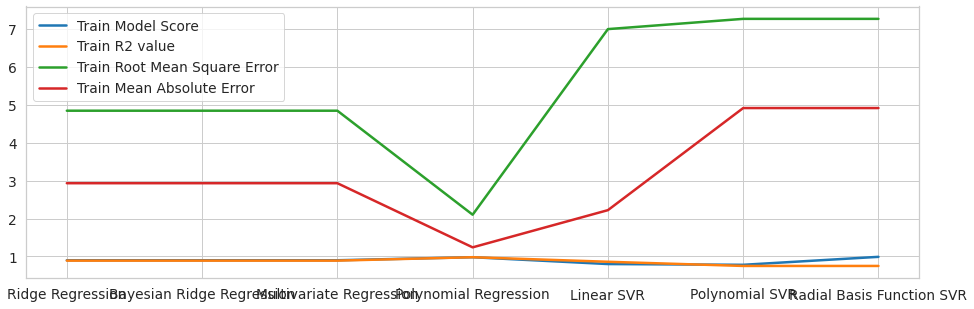

In [0]:
# Fetching the performance of the training models
train_rmse = [train_rmse_ridgecv, train_rmse_bayesianridge, train_rmse_multilinear, train_rmse_polynomial, train_rmse_svr_linear, train_rmse_svr_poly, train_rmse_svr_rbf]
train_mae = [train_mae_ridgecv, train_mae_bayesianridge, train_mae_multilinear, train_mae_polynomial, train_mae_svr_linear, train_mae_svr_poly,train_mae_svr_rbf]
train_r2 = [train_r2_ridgecv, train_r2_bayesianridge, train_r2_multilinear, train_r2_polynomial, train_r2_svr_linear, train_r2_svr_poly, train_r2_svr_rbf]
train_model_score = [ridgecv_train_score, bayesianridge_train_score, multilinear_train_score, polynomial_train_score, svr_linear_train_score, svr_poly_train_score, svr_rbf_train_score]

# Creating a model comparison dataframe for Train Data
col={'Train Model Score': train_model_score, 'Train R2 value': train_r2, 'Train Root Mean Square Error':train_rmse,'Train Mean Absolute Error':train_mae}
models=['Ridge Regression','Bayesian Ridge Regression', 'Multivariate Regression','Polynomial Regression','Linear SVR', 'Polynomial SVR', 'Radial Basis Function SVR']
train_model_comparison_df=DataFrame(data=col,index=models)
train_model_comparison_df.plot(kind='line', figsize =(16,5))
train_model_comparison_df

,Model Score,R2 value,Root Mean Square Error,Mean Absolute Error
Ridge Regression,0.89,0.87,5.00,2.95
Bayesian Ridge Regression,0.89,0.87,5.00,2.95
Multivariate Regression,0.89,0.87,5.00,2.95
Polynomial Regression,0.97,0.97,2.68,1.28
Linear SVR,0.78,0.84,7.04,2.20
Polynomial SVR,0.73,0.70,7.69,4.91
Radial Basis Function SVR,0.97,0.70,7.69,4.91


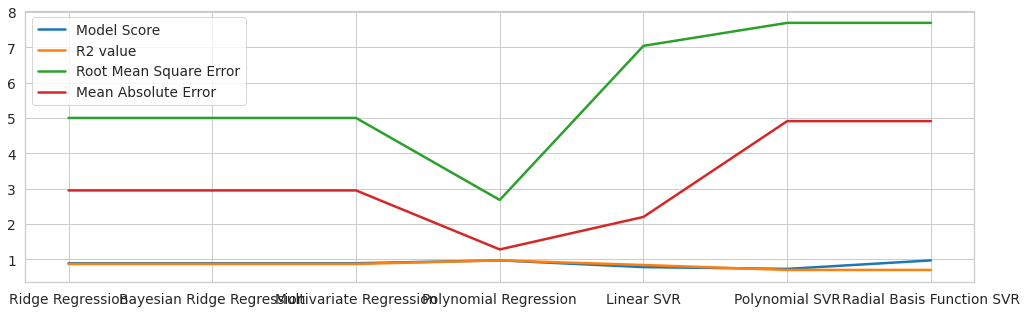

In [0]:
# Fetching the performance of the testiing models
test_rmse = [test_rmse_ridgecv, test_rmse_bayesianridge, test_rmse_multilinear, test_rmse_polynomial, test_rmse_svr_linear, test_rmse_svr_poly, test_rmse_svr_rbf]
test_mae = [test_mae_ridgecv, test_mae_bayesianridge, test_mae_multilinear, test_mae_polynomial, test_mae_svr_linear, test_mae_svr_poly, test_mae_svr_rbf]
test_r2 = [test_r2_ridgecv, test_r2_bayesianridge, test_r2_multilinear, test_r2_polynomial, test_r2_svr_linear, test_r2_svr_poly,test_r2_svr_rbf]
test_model_score = [ridgecv_test_score, bayesianridge_test_score, multilinear_test_score, polynomial_test_score, svr_linear_test_score, svr_poly_test_score, svr_rbf_test_score]

# Creating a model comparison dataframe for Test Data
col={'Model Score': test_model_score, 'R2 value': test_r2, 'Root Mean Square Error':test_rmse,'Mean Absolute Error':test_mae}
models=['Ridge Regression','Bayesian Ridge Regression', 'Multivariate Regression','Polynomial Regression','Linear SVR', 'Polynomial SVR', 'Radial Basis Function SVR']
test_model_comparison_df=DataFrame(data=col,index=models)
test_model_comparison_df.plot(kind='line', figsize =(17,5))
test_model_comparison_df

,Model Score,R2 value,Root Mean Square Error,Mean Absolute Error
Ridge Regression,0.91,0.89,6.84,4.19
Bayesian Ridge Regression,0.91,0.89,6.84,4.20
Multivariate Regression,0.91,0.89,6.84,4.19
Polynomial Regression,0.96,0.95,4.69,1.95
Linear SVR,0.75,0.63,11.24,8.01
Polynomial SVR,0.31,-2.16,18.58,12.70
Radial Basis Function SVR,0.80,-2.16,18.58,12.70


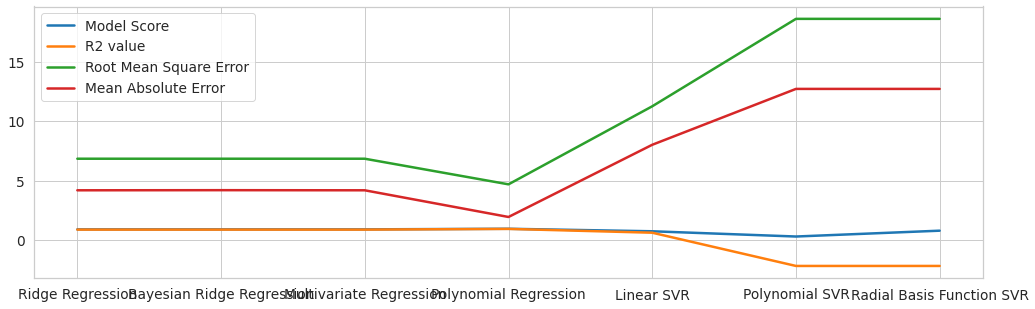

In [0]:
# Fetching the performance of the unseen data models
unseen_rmse =[unseen_rmse_ridgecv, unseen_rmse_bayesianridge, unseen_rmse_multilinear, unseen_rmse_polynomial, unseen_rmse_svr_linear, unseen_rmse_svr_poly, unseen_rmse_svr_rbf]
unseen_mae = [unseen_mae_ridgecv, unseen_mae_bayesianridge, unseen_mae_multilinear, unseen_mae_polynomial, unseen_mae_svr_linear, unseen_mae_svr_poly, unseen_mae_svr_rbf]
unseen_r2 = [unseen_r2_ridgecv, unseen_r2_bayesianridge, unseen_r2_multilinear, unseen_r2_polynomial, unseen_r2_svr_linear, unseen_r2_svr_poly, unseen_r2_svr_rbf]
unseen_model_score =[ridgecv_unseen_score, bayesianridge_unseen_score, multilinear_unseen_score, polynomial_unseen_score, svr_linear_unseen_score, svr_poly_unseen_score, svr_rbf_unseen_score]

# Creating a model comparison dataframe for Unseen Data
col={'Model Score': unseen_model_score, 'R2 value': unseen_r2, 'Root Mean Square Error':unseen_rmse,'Mean Absolute Error':unseen_mae}
models=['Ridge Regression','Bayesian Ridge Regression', 'Multivariate Regression','Polynomial Regression','Linear SVR', 'Polynomial SVR', 'Radial Basis Function SVR']
unseen_model_comparison_df=DataFrame(data=col,index=models)
unseen_model_comparison_df.plot(kind='line', figsize =(17,5))
unseen_model_comparison_df

It is significant from the above comparisons that the ***Polynomial Regression is the 'best fit' model for our regression problem.***  

The least errors is found between the actual and predicted h-index of an author through Polynomial Regressor model. The model performs well on not only train and test dataset, but gives ***95% accuracy for unseen dataset with 4.96 Root Mean Square Error.*** It is proven, that this model has low bias and low variance.

The difference in actual and predicted values for first 50 authors of unseen dataset is visualized below. In few cases, the model predicts the h-index smaller than the actual h-index due to the odd performance or degrading performance of the author in research field.

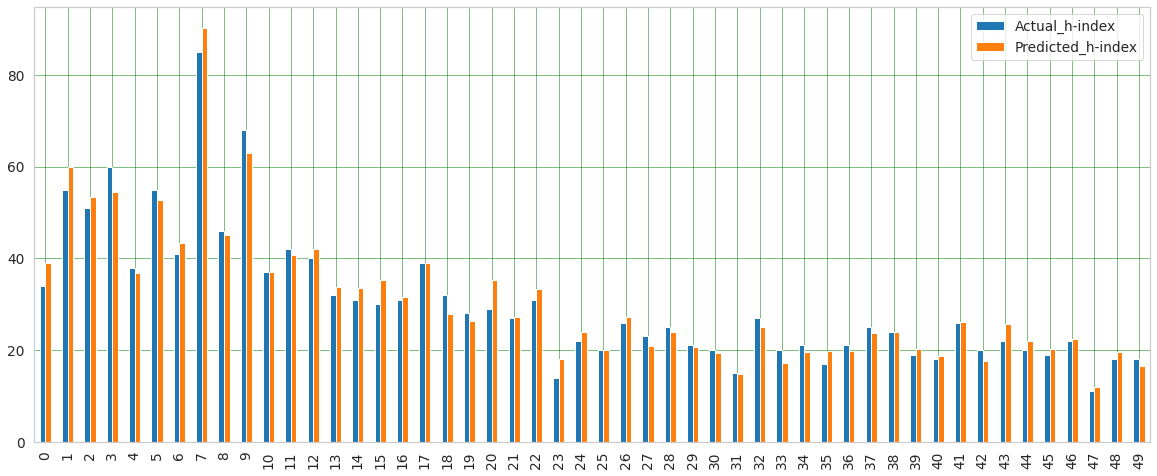

In [0]:
# Visualizing difference in actual and predicted values
results_df = pd.DataFrame({'Actual_h-index': y_unseen, 'Predicted_h-index': polynomial_predict_unseen_y})
results_df[:50].plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# References

1. "Ridge Regression For Better Usage". 2019. Medium. https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db.

2. "5.1 Graphical Methods". 2020. Itrcweb.Org. https://www.itrcweb.org/gsmc-1/Content/GW%20Stats/5%20Methods%20in%20indiv%20Topics/5%201%20Grph%20Methods.htm#Time.

3. Brownlee, Jason. 2018. "How To Calculate Correlation Between Variables In Python". Machine Learning Mastery. https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/.

4. "Chapter 3: Data Cleaning Steps And Techniques - Data Science Primer". 2020. Elitedatascience. https://elitedatascience.com/data-cleaning.

5. "Machine Learning: Comparing Methods - Python Data". 2019. Python Data. https://pythondata.com/comparing-machine-learning-methods/.

6. "Bayesian Ridge Regression — Scikit-Learn 0.11-Git Documentation". 2020. Ogrisel.Github.Io. https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/linear_model/plot_bayesian_ridge.html.

7. "Scikit Learn - Bayesian Ridge Regression - Tutorialspoint". 2020. Tutorialspoint.Com. https://www.tutorialspoint.com/scikit_learn/sc

8. "Visualizing Data With Pairs Plots In Python". 2018. Medium. https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166.

9. "Feature Selection Techniques In Machine Learning With Python". 2018. Medium. https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e.

10. "1.4. Support Vector Machines — Scikit-Learn 0.22.2 Documentation". 2020. Scikit-Learn.Org. https://scikit-learn.org/stable/modules/svm.html#regression.

11. "1.1. Linear Models — Scikit-Learn 0.22.2 Documentation". 2020. Scikit-Learn.Org. https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression.

12. "Choosing The Right Estimator — Scikit-Learn 0.22.2 Documentation". 2020. Scikit-Learn.Org. https://scikit-learn.org/stable/tutorial/machine_learning_m

13. "Introduction To Linear Regression In Python". 2019. Medium. https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0.

14. "Support Vector Regression Or SVR". 2018. Medium. https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff.

15. "How I Improved Accuracy Of My Machine Learning Project?". 2019. Medium. https://medium.com/fintechexplained/how-i-improved-accuracy-of-my-machine-learning-project-95639c8149c1.

16. "Topic Modeling In Python: Latent Dirichlet Allocation (LDA)". 2019. Medium. https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0.

17. "Beckerguides: Tools For Authors: What Is The H Index?". 2020. Beckerguides.Wustl.Edu. https://beckerguides.wustl.edu/authors/hin

18. "Best Universities In Canada". 2019. Times Higher Education (THE). https://www.timeshighereducation.com/student/best-universities/best-universities-canada#survey-answer.

19. Peters, Roel, and Roel Peters. 2019. "From Simple To Multiple Linear Regression With Python And Scikit – Sweetcode.Io". Sweetcode.Io. https://sweetcode.io/simple-multiple-linear-regression-python-scikit/.

20. Python, Real. 2020. "Linear Regression In Python – Real Python". Realpython.Com. https://realpython.com/linear-regression-in-python/.


